In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('seaborn')
sns.set(font_scale = 2.5)

import missingno as msno

import warnings
warnings.filterwarnings('ignore')

In [13]:
import matplotlib as mpl

sns.set_style('whitegrid') #스타일은 원하는 것을 사용하세요.

mpl.rc('font', family = 'Malgun Gothic') # Mac의 경우는 AppleGothic, 윈도우의 경우는 Malgun Gothic을 사용하면 됩니다 :) 
mpl.rc('axes', unicode_minus = False)

from IPython.display import set_matplotlib_formats
set_matplotlib_formats('retina')

1. 데이터셋 확인 - 대부분의 캐글 데이터들은 잘 정제되어 있습니다. 하지만 가끔 null data가 존재합니다. 이를 확인하고, 향후 수정합니다.

2. 탐색적 데이터 분석(exploratory data analysis) - 여러 feature 들을 개별적으로 분석하고, feature 들 간의 상관관계를 확인합니다. 여러 시각화 툴을 사용하여 insight를 얻습니다.

3. feature engineering - 모델을 세우기에 앞서, 모델의 성능을 높일 수 있도록 feature 들을 engineering 합니다. one-hot encoding, class로 나누기, 구간으로 나누기, 텍스트 데이터 처리 등을 합니다.

4. model 만들기 - sklearn 을 사용해 모델을 만듭니다. 파이썬에서 머신러닝을 할 때는 sklearn 을 사용하면 수많은 알고리즘을 일관된 문법으로 사용할 수 있습니다. 물론 딥러닝을 위해 tensorflow, pytorch 등을 사용할 수 도 있습니다.

5. 모델 학습 및 예측 - trainset 을 가지고 모델을 학습시킨 후, testset 을 가지고 prediction 합니다.

6. 모델 평가 - 예측 성능이 원하는 수준인지 판단합니다. 풀려는 문제에 따라 모델을 평가하는 방식도 달라집니다. 학습된 모델이 어떤 것을 학습하였는 지 확인해봅니다.

In [3]:
# 화면에 출력하는 데이터 프레임의 최대 row 수를 500으로 설정합니다.
pd.set_option('display.max_rows', 500)

# 화면에 출력하는 데이터 프레임의 최대 column 수를 500으로 설정합니다.
pd.set_option('display.max_columns', 500)

In [4]:
df_train = pd.read_csv('train.csv')
df_test = pd.read_csv('test.csv')

In [5]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [23]:
df_test.head()
# Survived가 존재하지 않음 -> 예측(0 or 1)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [6]:
df_train.describe()
# age에서 null값 존재
# 문자형 변수는 기초통계량을 보여주지 않음

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [7]:
df_test.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [8]:
for col in df_train.columns:
    msg = ('column : {:>10}\t Percent of NaN value : {:.2f}%'
           .format(col, 100 * df_train[col].isnull().sum() / df_train[col].shape[0])
          )
    print(msg)
# age, cabin, embarked 컬럼이 결측치를 보유하고 있음

column : PassengerId	 Percent of NaN value : 0.00%
column :   Survived	 Percent of NaN value : 0.00%
column :     Pclass	 Percent of NaN value : 0.00%
column :       Name	 Percent of NaN value : 0.00%
column :        Sex	 Percent of NaN value : 0.00%
column :        Age	 Percent of NaN value : 19.87%
column :      SibSp	 Percent of NaN value : 0.00%
column :      Parch	 Percent of NaN value : 0.00%
column :     Ticket	 Percent of NaN value : 0.00%
column :       Fare	 Percent of NaN value : 0.00%
column :      Cabin	 Percent of NaN value : 77.10%
column :   Embarked	 Percent of NaN value : 0.22%


In [9]:
for col in df_test.columns:
    msg = ('column : {:>10}\t Percent of NaN value : {:.2f}'
           .format(col, 100 * df_test[col].isnull().sum() / df_test.shape[0])
          )
    print(msg)
# age, fare, cabin 컬럼이 결측치를 보유하고 있음

column : PassengerId	 Percent of NaN value : 0.00
column :     Pclass	 Percent of NaN value : 0.00
column :       Name	 Percent of NaN value : 0.00
column :        Sex	 Percent of NaN value : 0.00
column :        Age	 Percent of NaN value : 20.57
column :      SibSp	 Percent of NaN value : 0.00
column :      Parch	 Percent of NaN value : 0.00
column :     Ticket	 Percent of NaN value : 0.00
column :       Fare	 Percent of NaN value : 0.24
column :      Cabin	 Percent of NaN value : 78.23
column :   Embarked	 Percent of NaN value : 0.00


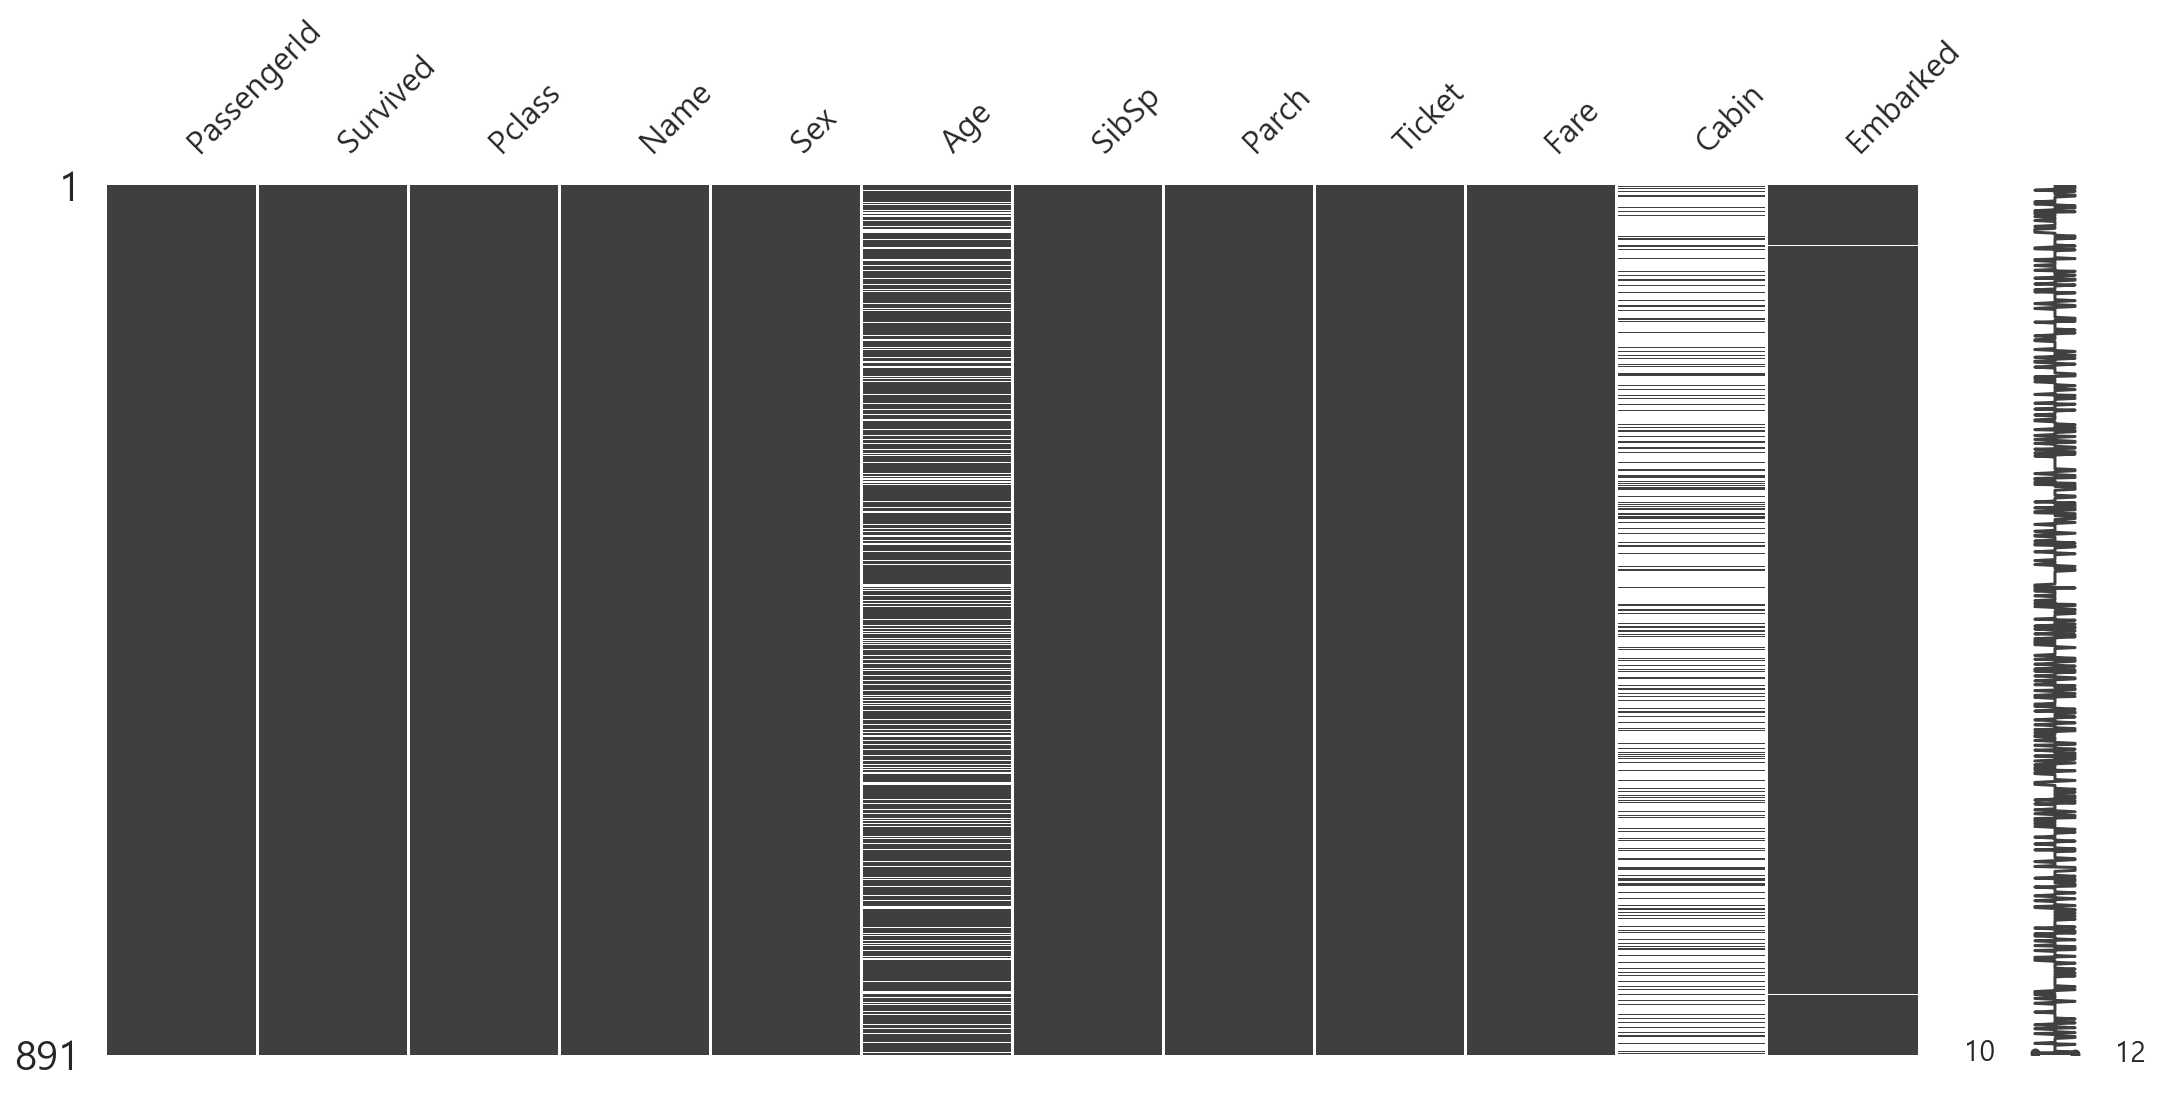

In [10]:
msno.matrix(df_train, figsize = (18,8))

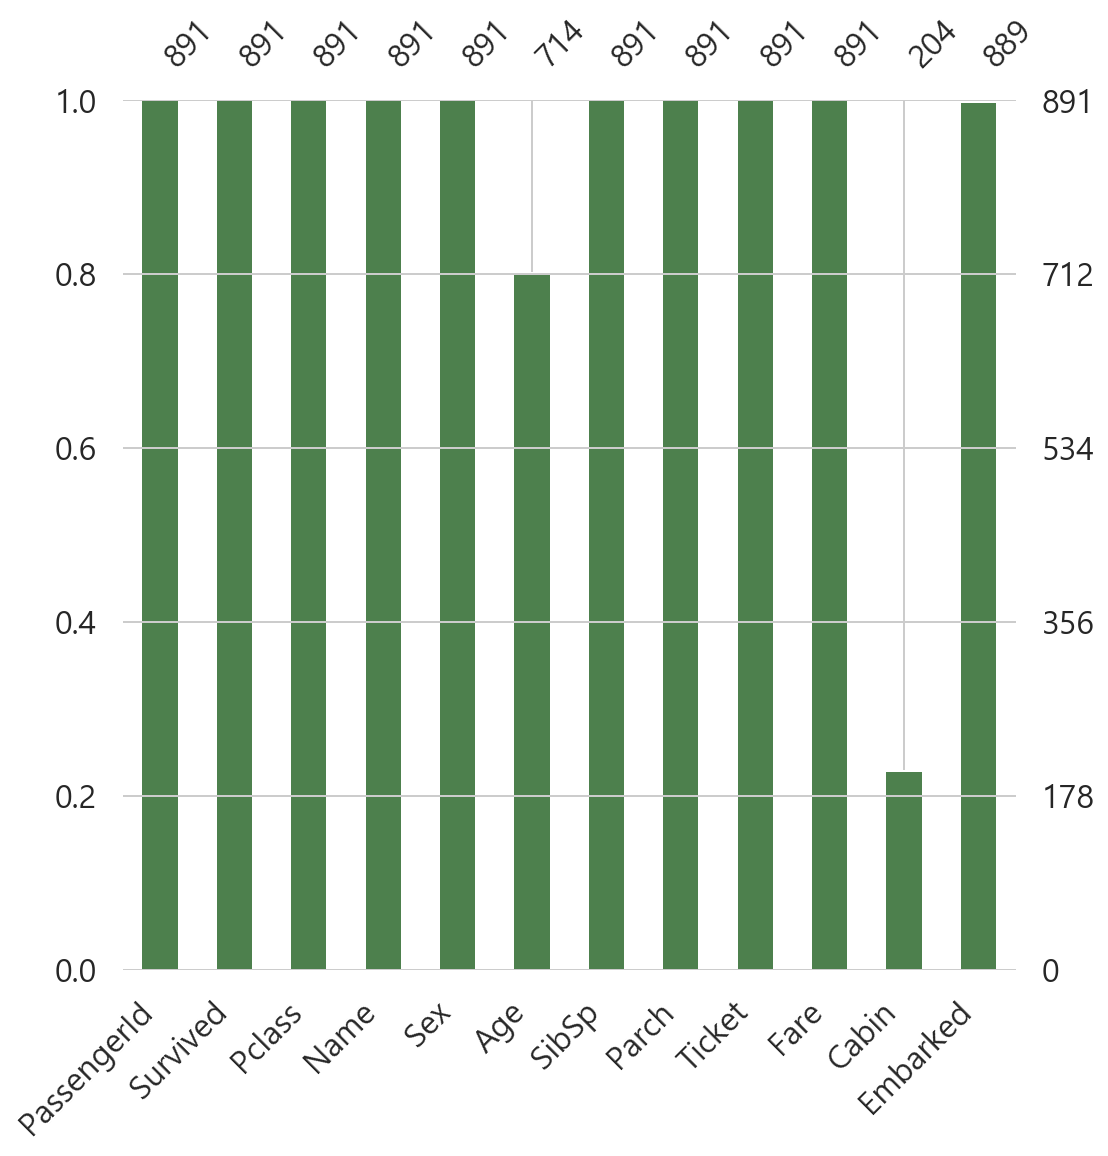

In [11]:
msno.bar(df_train, figsize = (8, 8), color = (.3, .5, .3))

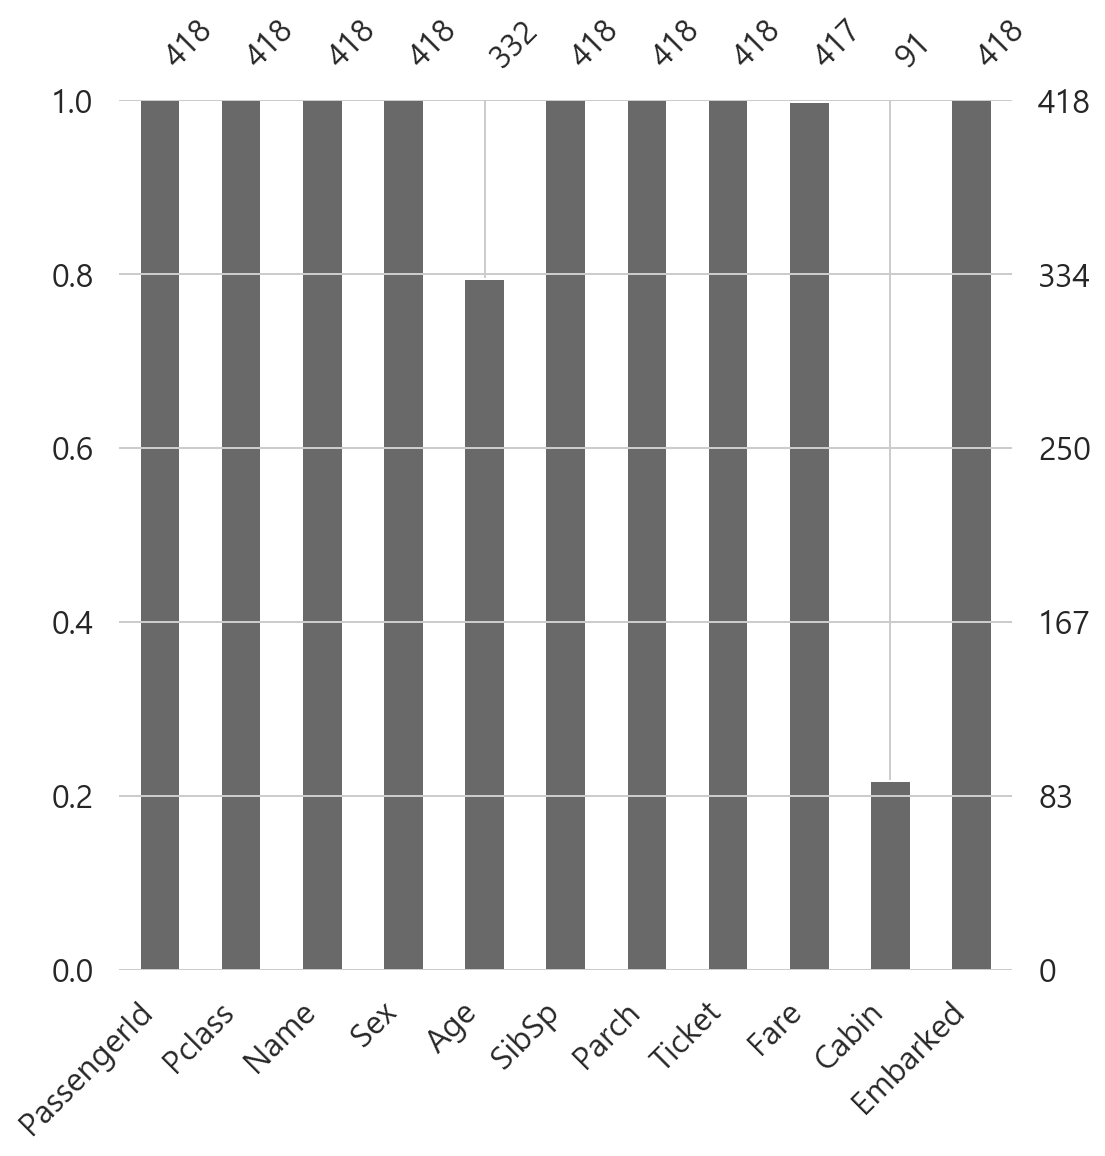

In [17]:
msno.bar(df_test, figsize = (8, 8))

<table>
<thead><tr>
<th style="text-align:center">변수(feature, variable)</th>
<th style="text-align:center">정의</th>
<th style="text-align:center">설명</th>
<th style="text-align:center">타입</th>
</tr>
</thead>
<tbody>
<tr>
<td style="text-align:center">survival</td>
<td style="text-align:center">생존여부</td>
<td style="text-align:center">target label 임. 1 = 생존, 0 = 사망 으로 표현됨</td>
<td style="text-align:center">integer</td>
</tr>
<tr>
<td style="text-align:center">Pclass</td>
<td style="text-align:center">티켓의 클래스</td>
<td style="text-align:center">1 = 1st, 2 = 2nd, 3 = 3rd 클래스로 나뉘며 categorical feature</td>
<td style="text-align:center">integer </td>
</tr>
<tr>
<td style="text-align:center">sex</td>
<td style="text-align:center">성별</td>
<td style="text-align:center">male, female 로 구분되며 binary</td>
<td style="text-align:center">string</td>
</tr>
<tr>
<td style="text-align:center">Age</td>
<td style="text-align:center">나이</td>
<td style="text-align:center">continuous</td>
<td style="text-align:center">integer</td>
</tr>
<tr>
<td style="text-align:center">sibSp</td>
<td style="text-align:center">함께 탑승한 형제와 배우자의 수</td>
<td style="text-align:center">quantitative</td>
<td style="text-align:center">integer</td>
</tr>
<tr>
<td style="text-align:center">parch</td>
<td style="text-align:center">함께 탑승한 부모, 아이의 수</td>
<td style="text-align:center">quantitative</td>
<td style="text-align:center">integer</td>
</tr>
<tr>
<td style="text-align:center">ticket</td>
<td style="text-align:center">티켓 번호</td>
<td style="text-align:center">alphabat + integer</td>
<td style="text-align:center">string</td>
</tr>
<tr>
<td style="text-align:center">fare</td>
<td style="text-align:center">탑승료</td>
<td style="text-align:center">continuous</td>
<td style="text-align:center">float</td>
</tr>
<tr>
<td style="text-align:center">cabin</td>
<td style="text-align:center">객실 번호</td>
<td style="text-align:center">alphabat + integer</td>
<td style="text-align:center">string</td>
</tr>
<tr>
<td style="text-align:center">embared</td>
<td style="text-align:center">탑승 항구</td>
<td style="text-align:center">C = Cherbourg, Q = Queenstown, S = Southampton</td>
<td style="text-align:center">string</td>
</tr>
</tbody>
</table>

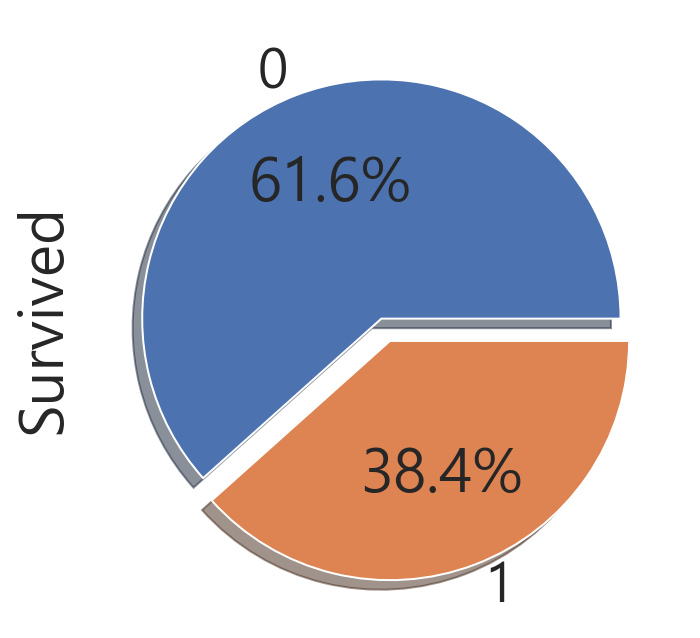

In [33]:
df_train['Survived'].value_counts().plot.pie(explode = [0, 0.1], autopct = '%1.1f%%', shadow = True)

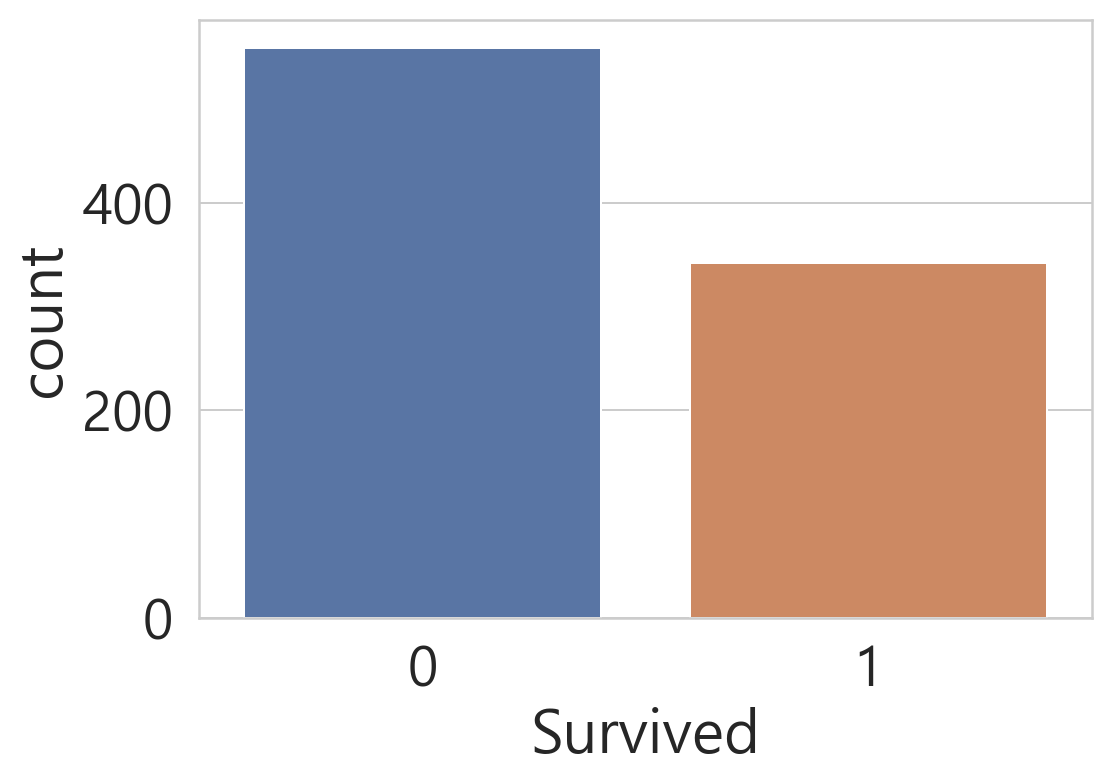

In [35]:
sns.countplot(df_train['Survived'])

In [38]:
# Pclass
cols = ['Survived', 'Pclass']
df_train[cols].groupby('Pclass', as_index = True).count()
# 총 Pclass의 수

,Survived
Pclass,
1,216
2,184
3,491


In [39]:
df_train.pivot_table(
    index = 'Pclass',
    values = 'Survived',
    aggfunc = 'sum'
)

,Survived
Pclass,
1,136
2,87
3,119


In [45]:
table = df_train.pivot_table(
    index = 'Pclass',
    values = 'Survived',
    aggfunc = ['sum', 'count']
)

table['Percent_of_Survived'] = table['sum']/table['count']

table.columns = ['Survived_sum','Survived_count','Percent_of_Survived']
table
# Pclass가 높은 사람들의 생존률이 가장 높다. 1 > 2 > 3

,Survived_sum,Survived_count,Percent_of_Survived
Pclass,,,
1,136,216,0.629630
2,87,184,0.472826
3,119,491,0.242363


In [49]:
pd.crosstab(df_train['Pclass'], df_train['Survived'], margins = True).style.background_gradient(cmap = 'summer_r')

Survived,0,1,All
Pclass,,,
1,80,136,216
2,97,87,184
3,372,119,491
All,549,342,891


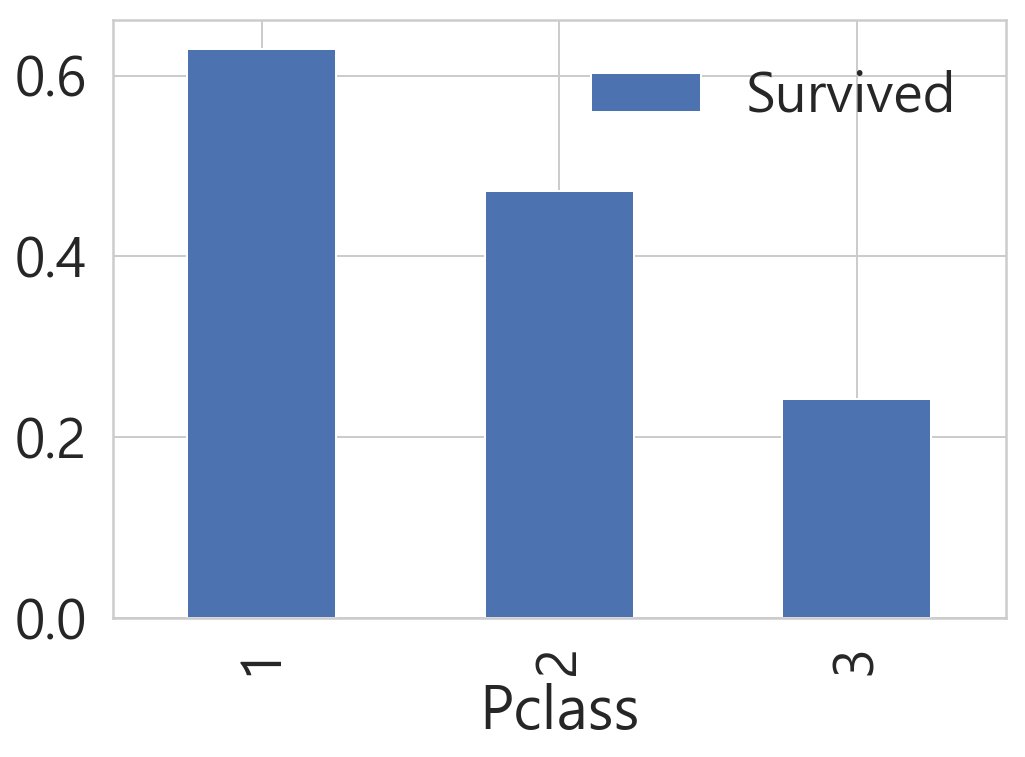

In [57]:
df_train[cols].groupby('Pclass').mean().sort_values(by = 'Survived', ascending = False).plot.bar()

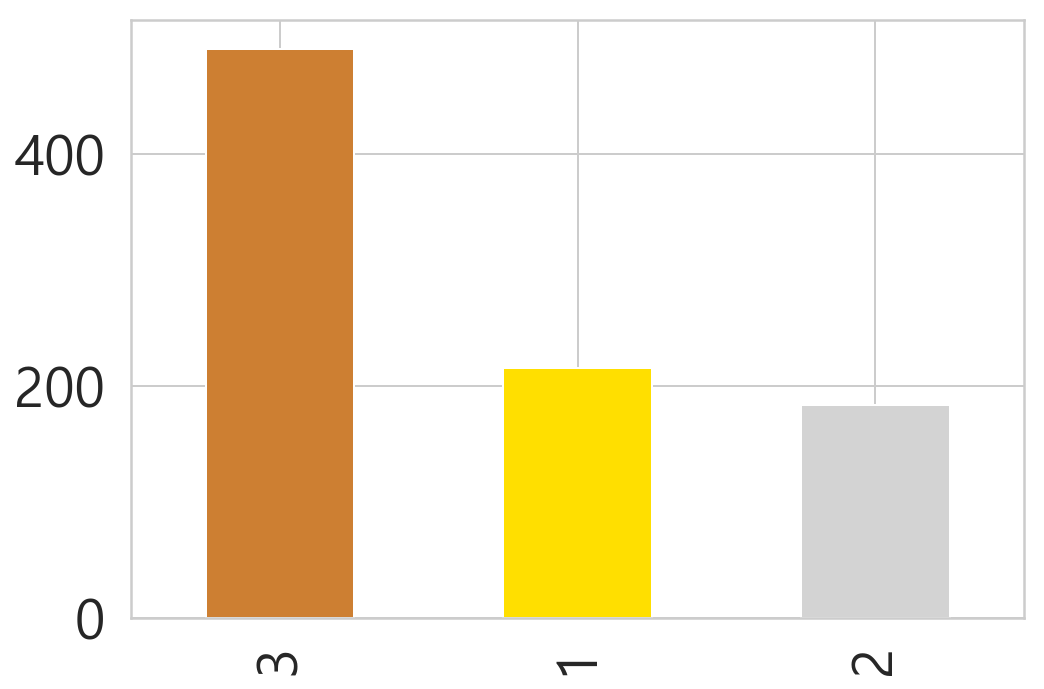

In [65]:
df_train['Pclass'].value_counts().plot.bar(color = ['#CD7F32','#FFDF00','#D3D3D3'])

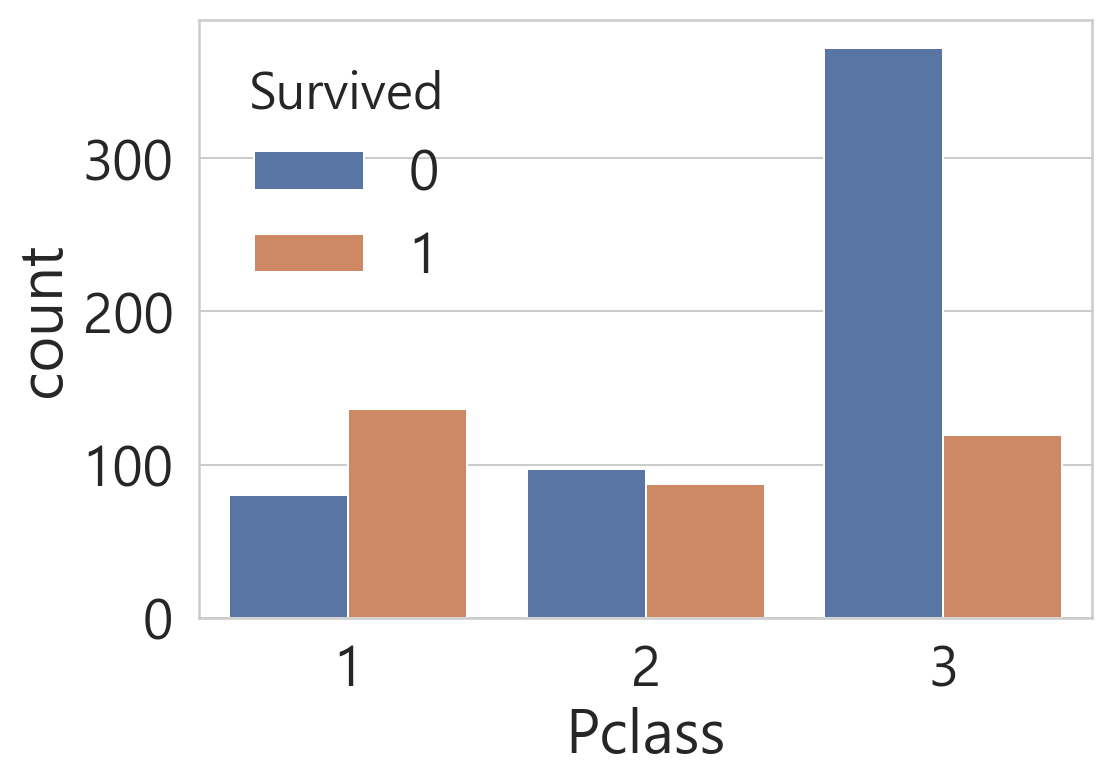

In [67]:
sns.countplot('Pclass', hue = 'Survived', data = df_train)

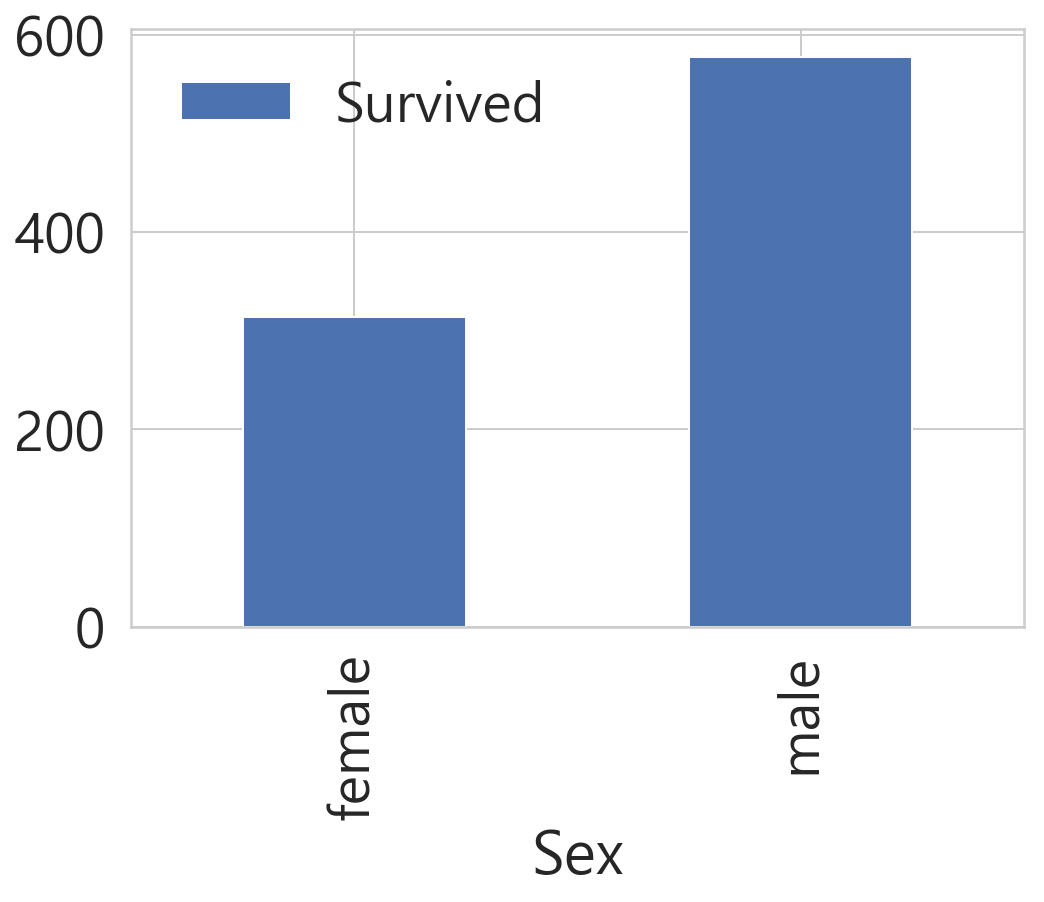

In [73]:
df_train[['Survived', 'Sex']].groupby('Sex', as_index = True).count().plot.bar()

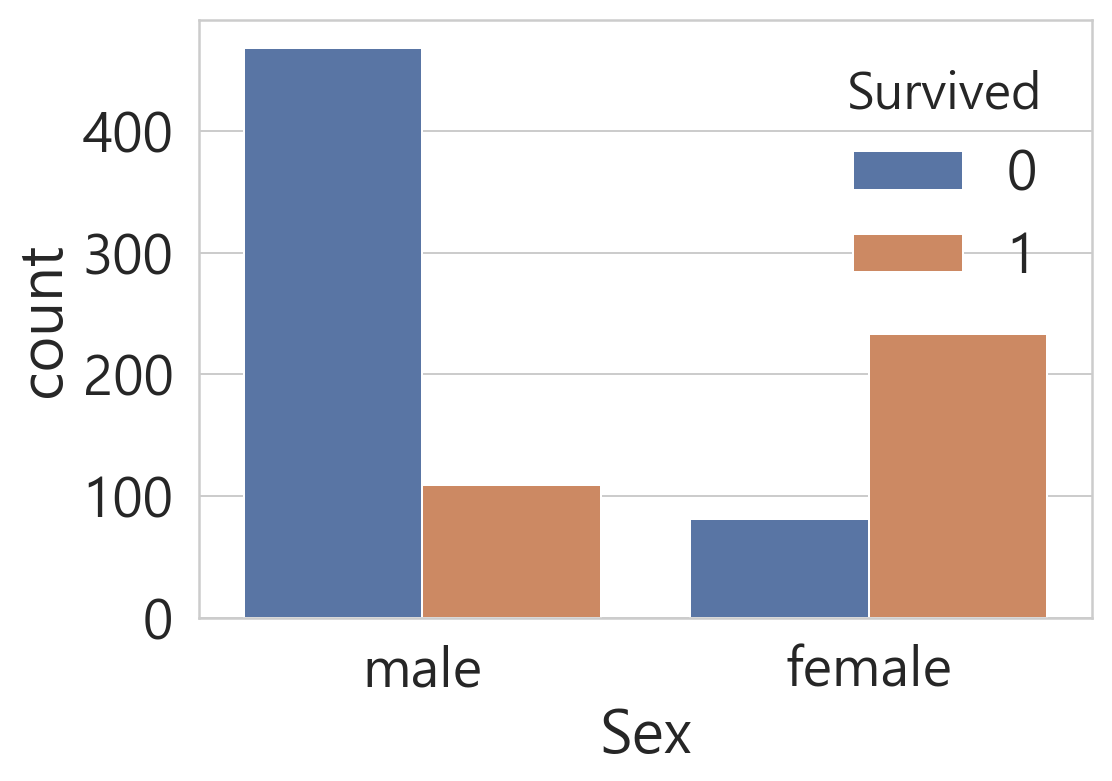

In [78]:
sns.countplot("Sex", hue = 'Survived', data = df_train)
# 여성의 생존이 더 많고, 비율 또한 더 높다.

In [83]:
table1 = df_train.pivot_table(
    index = 'Sex',
    values = 'Survived',
    aggfunc = ['count', 'sum']
)

table1['percent'] = table1['sum']/table1['count']

table1
# 탑승객이 남성이 더 많음.
# 생존률은 여성이 더 높음
# 생존한 수도 여성이 더 높음

,count,sum,percent
,Survived,Survived,
Sex,,,
female,314,233,0.742038
male,577,109,0.188908


In [84]:
df_train[['Survived', 'Sex']].groupby('Sex').mean()

,Survived
Sex,
female,0.742038
male,0.188908


In [89]:
pd.crosstab(df_train['Sex'], df_train['Survived'], margins = True).style.background_gradient(cmap = 'RdBu_r')

Survived,0,1,All
Sex,,,
female,81,233,314
male,468,109,577
All,549,342,891


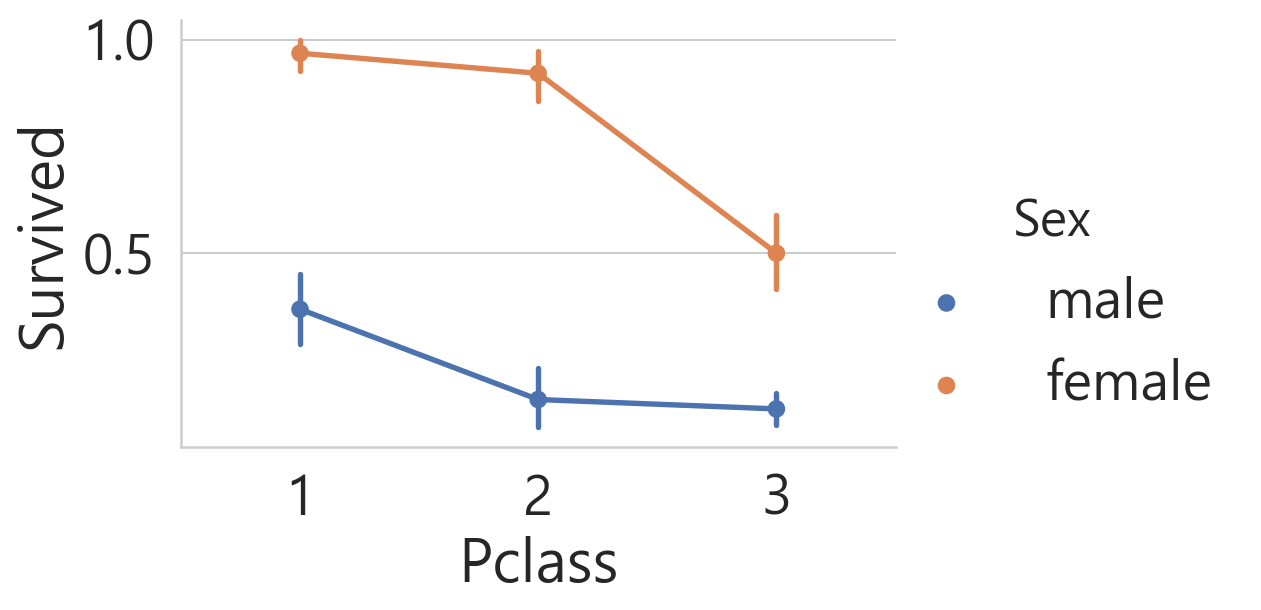

In [91]:
sns.factorplot('Pclass', 'Survived', hue = 'Sex', data = df_train, size = 5, aspect = 1.5)
# Pclass가 높은 여성일 경우 생존률이 가장 높고 Pclass가 낮은 남성일 수록 생존률이 떨어진다.
# Pclass가 높고 여성일 경우 생존을 할 확률이 높으며, Pclass가 낮고 남성일 수록 생존할 확률이 낮아진다.

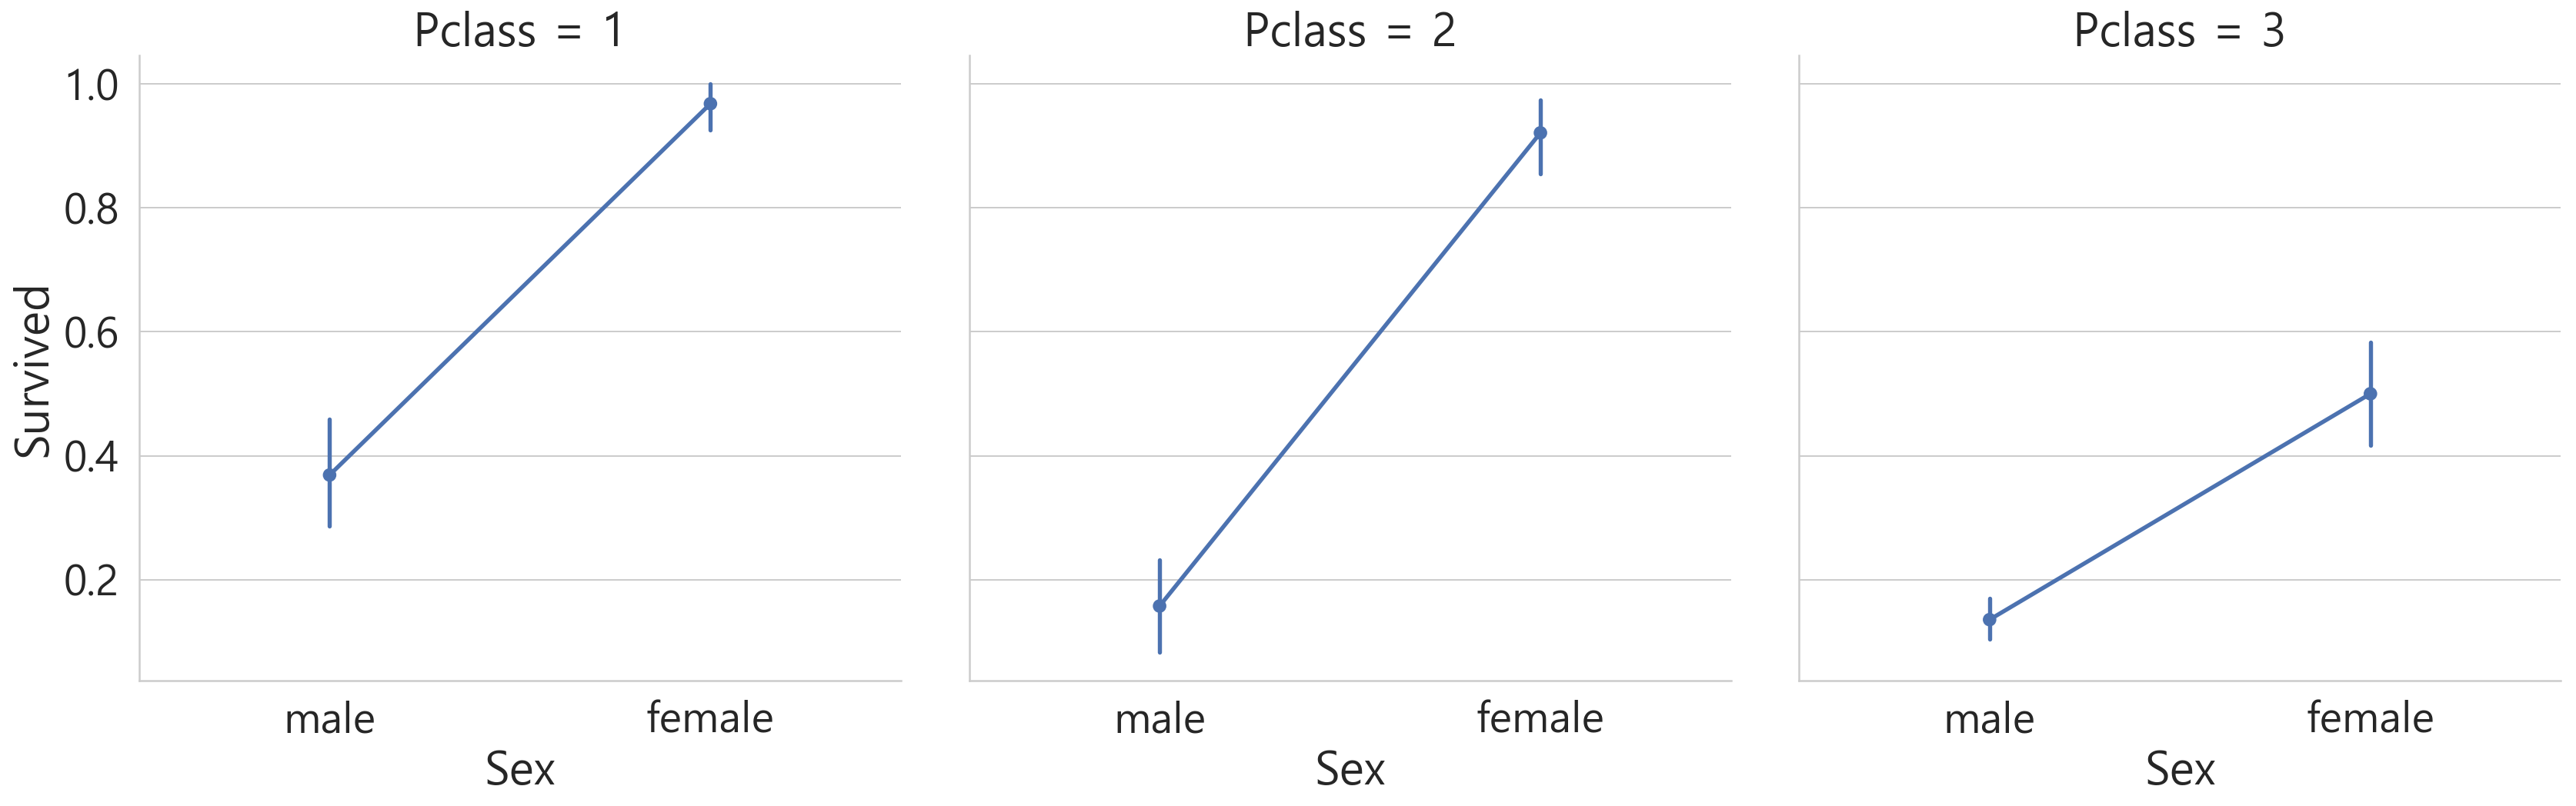

In [105]:
sns.factorplot('Sex', 'Survived', col = 'Pclass',
               data = df_train, size = 8, aspect = 1)

In [130]:
# 177개의 결측치
df_train['Age'].isnull().sum()

177

In [140]:
df_train["Age"].unique()
# 소수점 아래의 숫자가 존재하는 나이가 있음
# 1살 이하의 아이들은 개월수로 추축, 그러나 23.5와 같은 값은?

array([22.  , 38.  , 26.  , 35.  ,   nan, 54.  ,  2.  , 27.  , 14.  ,
        4.  , 58.  , 20.  , 39.  , 55.  , 31.  , 34.  , 15.  , 28.  ,
        8.  , 19.  , 40.  , 66.  , 42.  , 21.  , 18.  ,  3.  ,  7.  ,
       49.  , 29.  , 65.  , 28.5 ,  5.  , 11.  , 45.  , 17.  , 32.  ,
       16.  , 25.  ,  0.83, 30.  , 33.  , 23.  , 24.  , 46.  , 59.  ,
       71.  , 37.  , 47.  , 14.5 , 70.5 , 32.5 , 12.  ,  9.  , 36.5 ,
       51.  , 55.5 , 40.5 , 44.  ,  1.  , 61.  , 56.  , 50.  , 36.  ,
       45.5 , 20.5 , 62.  , 41.  , 52.  , 63.  , 23.5 ,  0.92, 43.  ,
       60.  , 10.  , 64.  , 13.  , 48.  ,  0.75, 53.  , 57.  , 80.  ,
       70.  , 24.5 ,  6.  ,  0.67, 30.5 ,  0.42, 34.5 , 74.  ])

In [113]:
print(f'가장 나이 많은 사람 {max(df_train["Age"])}세, 가장 나이가 어린 사람 {min(df_train["Age"])}세')
print("평균 나이 {:.2f}".format(df_train['Age'].mean()))

가장 나이 많은 사람 80.0세, 가장 나이가 어린 사람 0.42세
평균 나이 29.70


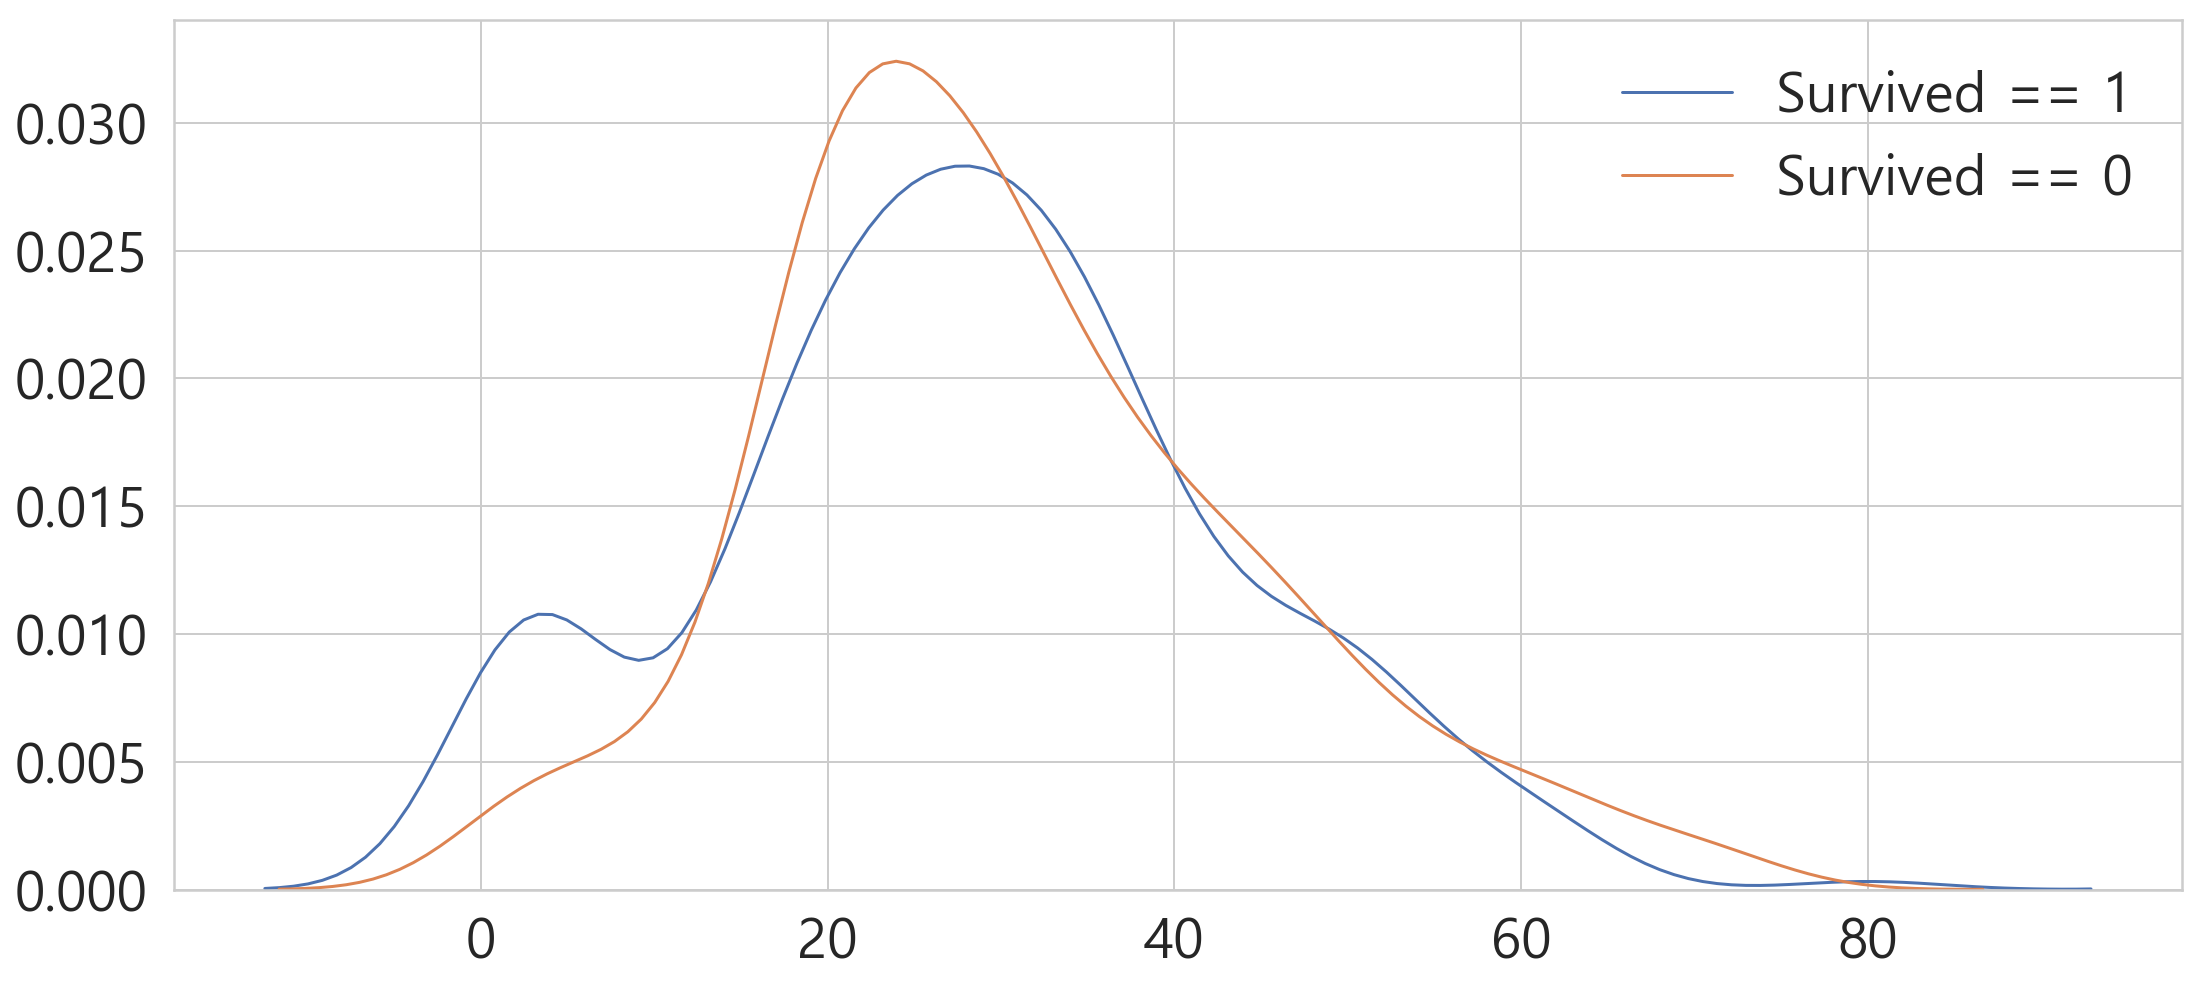

In [126]:
plt.figure(figsize = (18, 8))
sns.kdeplot(df_train.loc[df_train['Survived'] == 1, "Age"])
sns.kdeplot(df_train.loc[df_train['Survived'] == 0, "Age"])

plt.legend(['Survived == 1', 'Survived == 0'])
# 어린 아이들의 생존률이 더 높았다.

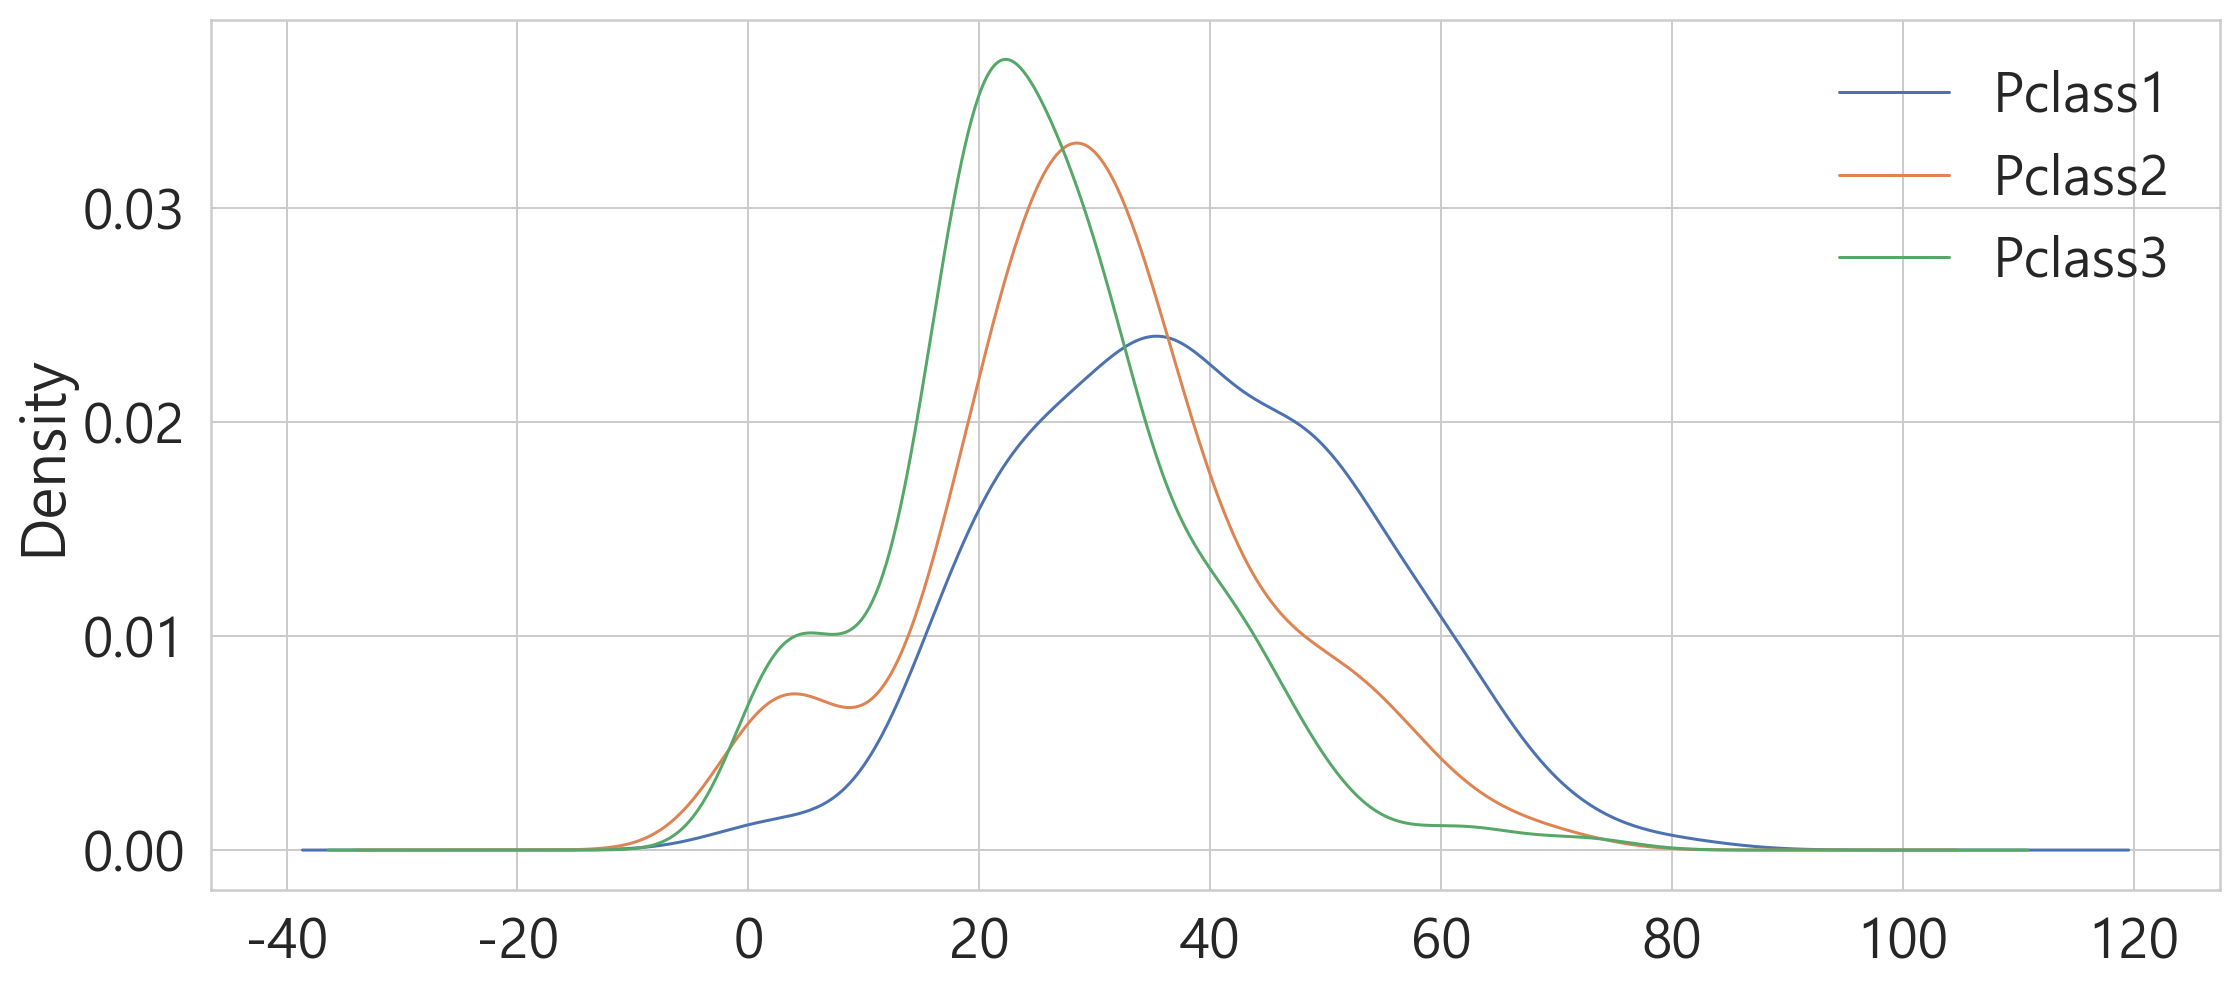

In [127]:
plt.figure(figsize = (18, 8))
df_train['Age'][df_train['Pclass'] == 1].plot(kind = 'kde')
df_train['Age'][df_train['Pclass'] == 2].plot(kind = 'kde')
df_train['Age'][df_train['Pclass'] == 3].plot(kind = 'kde')

plt.legend(['Pclass1', 'Pclass2', 'Pclass3'])
# Pclass가 높을 수록 나이가 많은 사람들이 많다.

In [142]:
cum_rate = []

for i in range(1,80):
    cum_rate.append(
        df_train[df_train['Age'] < i]['Survived'].sum() / len(df_train[df_train['Age'] < i]['Survived'])
    )

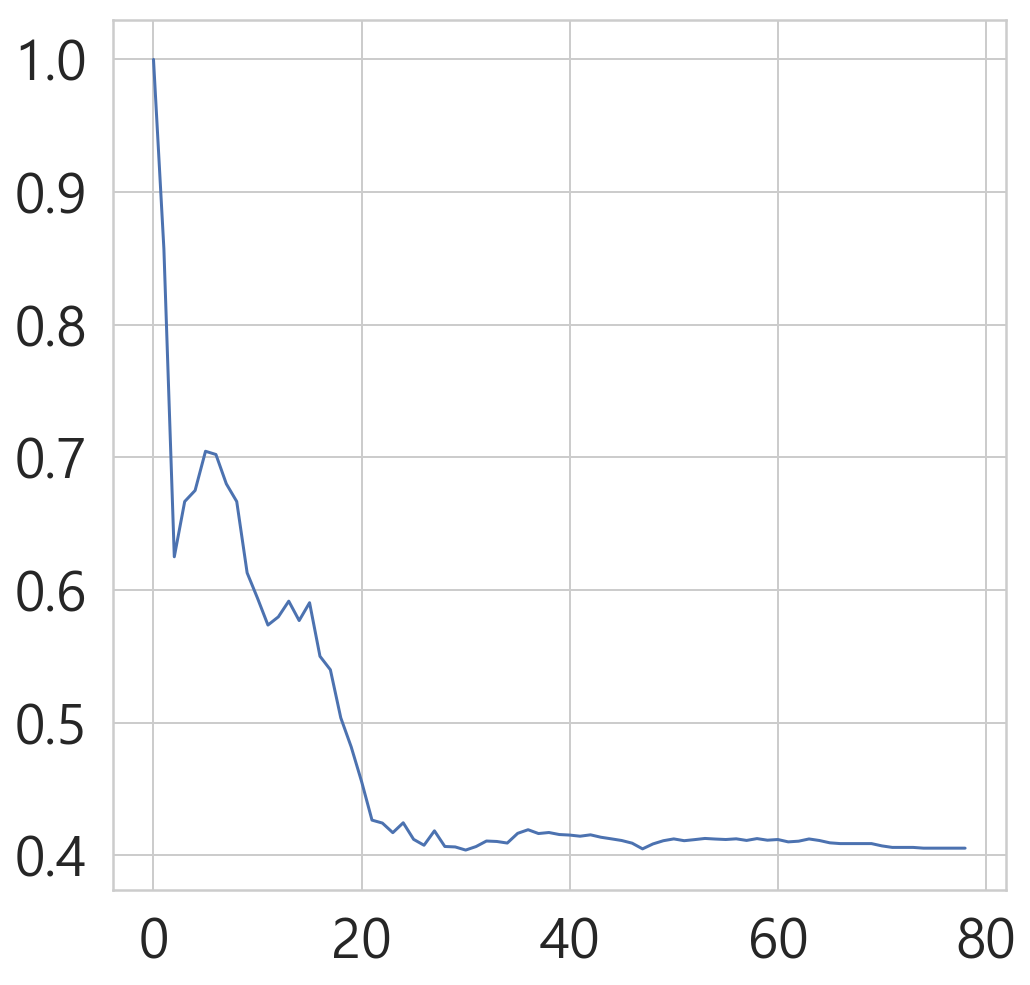

In [147]:
plt.figure(figsize = (8, 8))
plt.plot(cum_rate)
plt.title()
# 나이가 어릴수록 생존률이 높다.

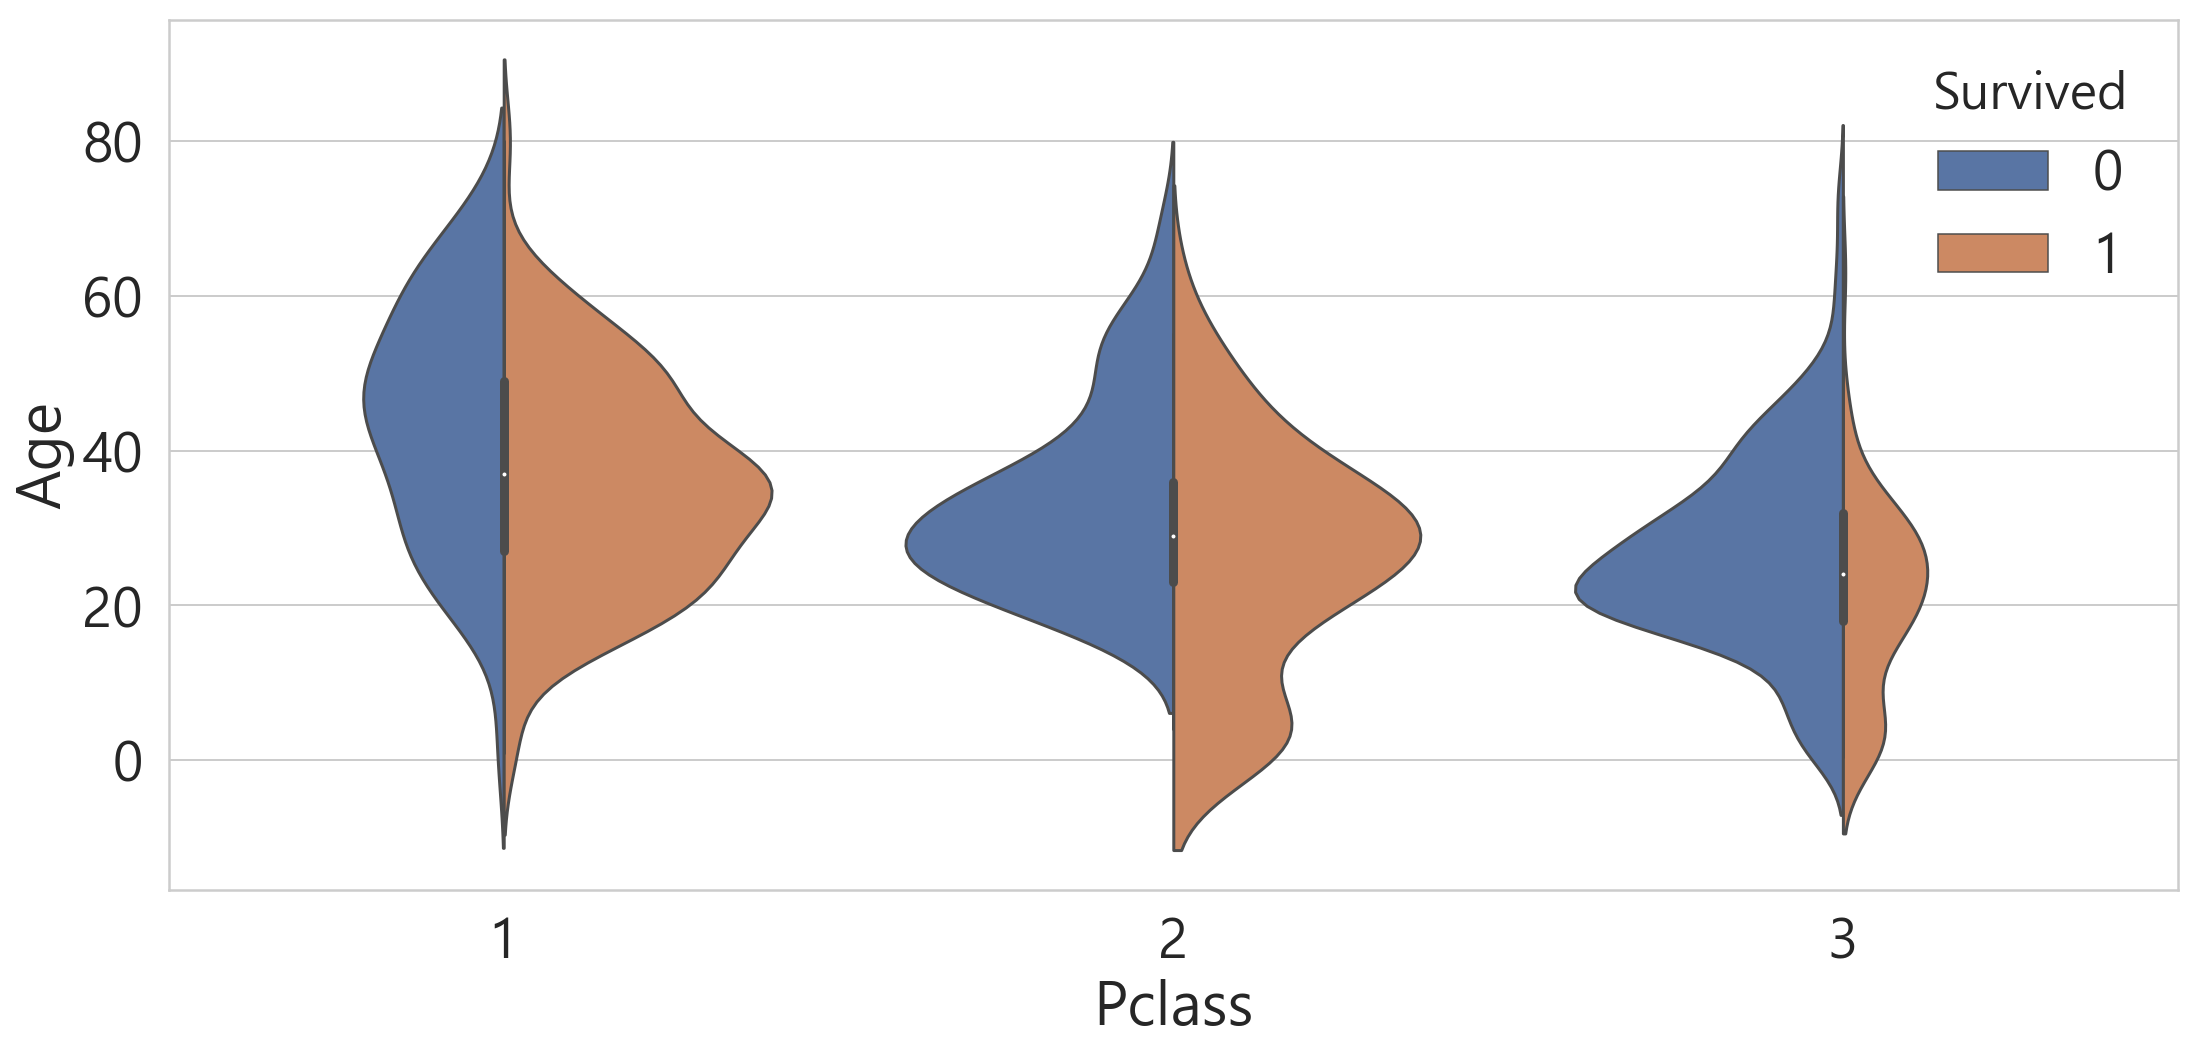

In [166]:
plt.figure(figsize = (18, 8))
sns.violinplot('Pclass', 'Age', hue = 'Survived', data = df_train, scale = 'count', split = True)
# 나이가 어린 사람들의 생존이 많았다.
# 또한 Pclass가 높으면서 나이가 어린 사람들의 생존 수가 제일 많았다.

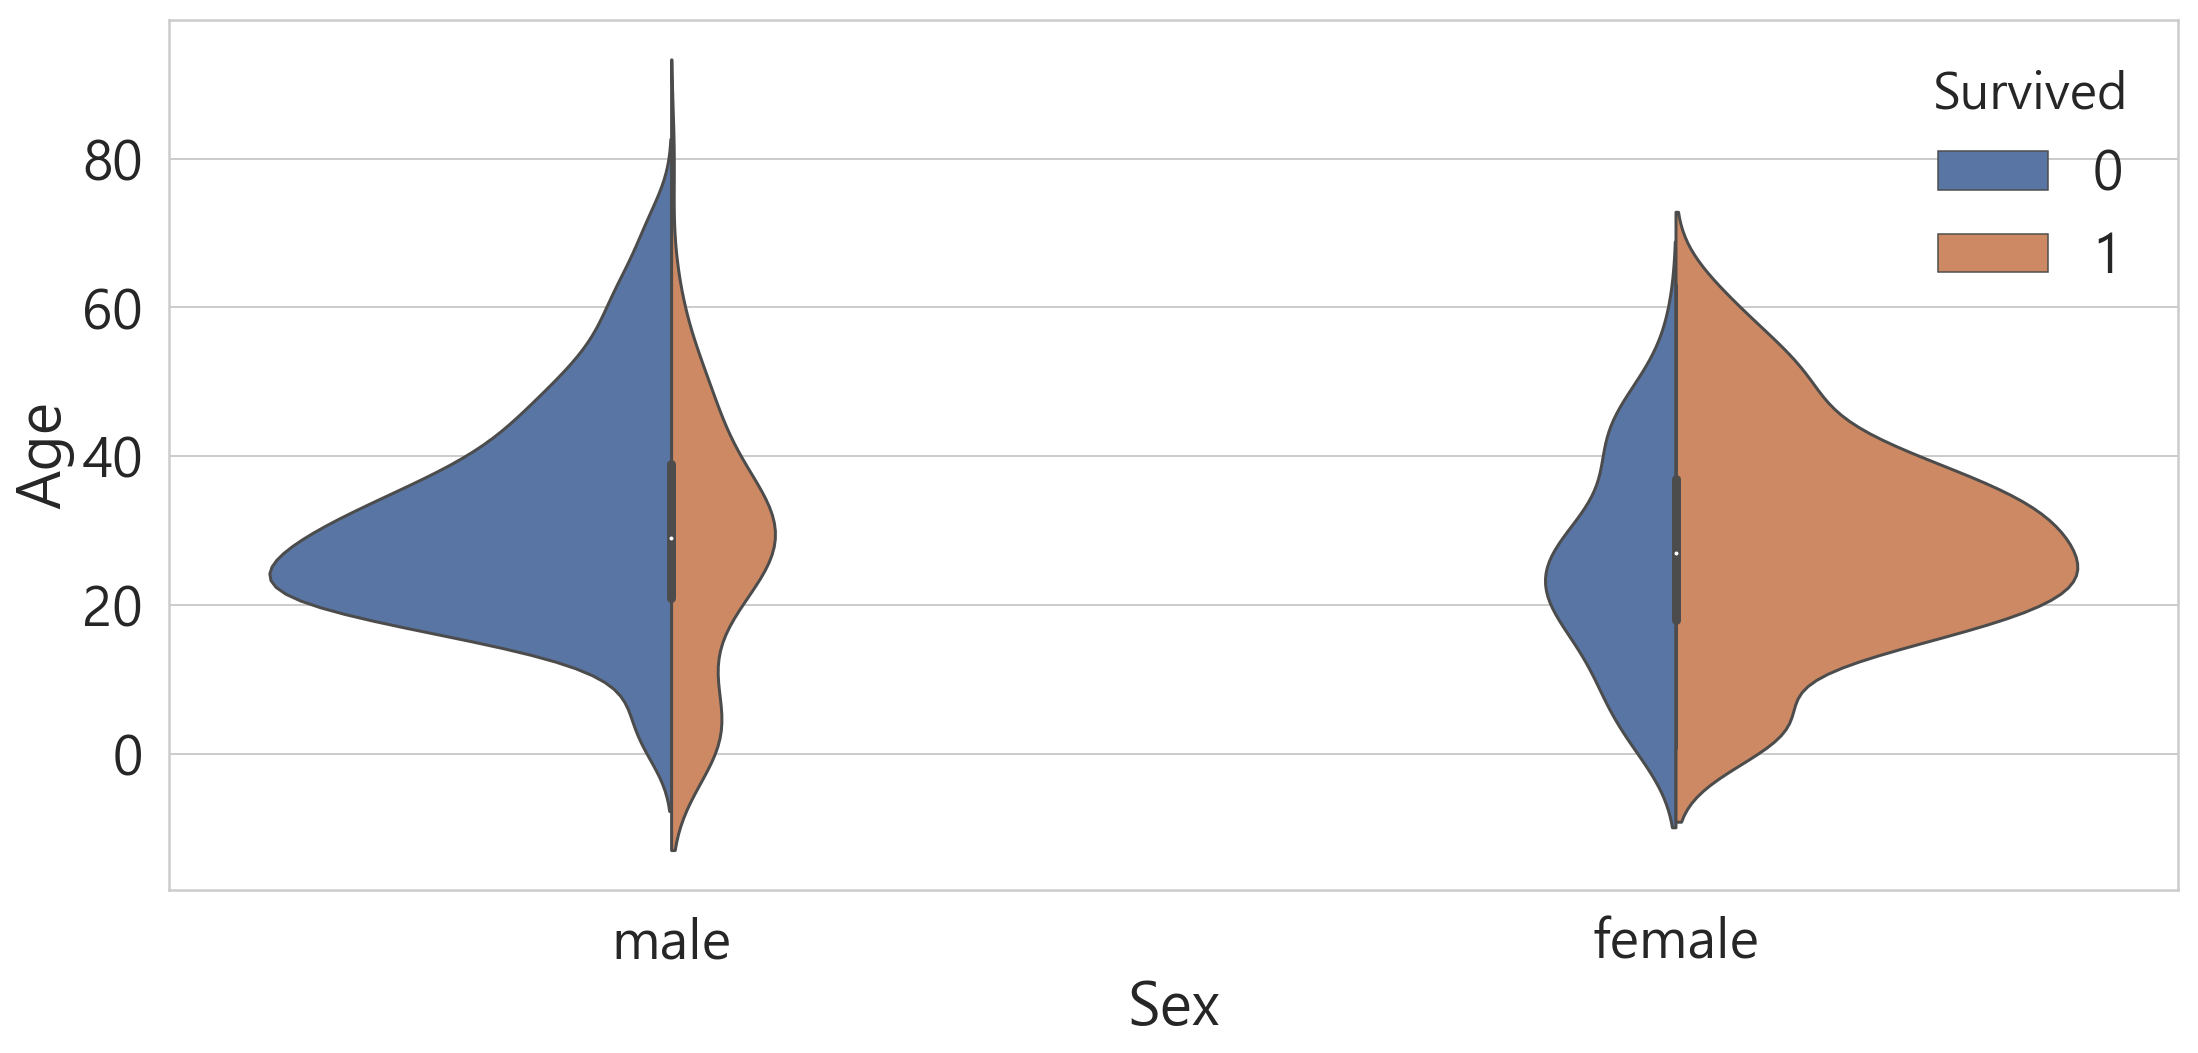

In [169]:
plt.figure(figsize = (18, 8))
sns.violinplot('Sex', 'Age', hue = 'Survived', data = df_train, split = True, scale = 'count')
# 여성이 남성보다 생존의 수가 더 많았다.

In [175]:
df_train[['Embarked', 'Survived']].groupby('Embarked').count()

,Survived
Embarked,
C,168
Q,77
S,644


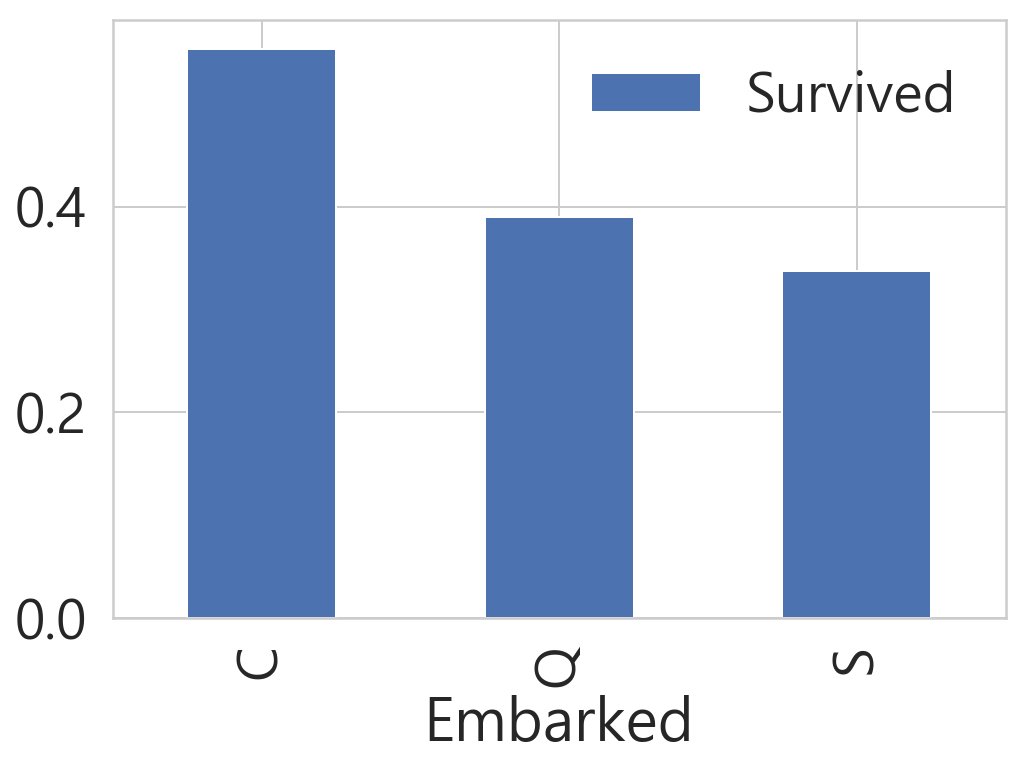

In [177]:
df_train[['Embarked', 'Survived']].groupby('Embarked').mean().plot.bar()
# C항구에서 탄 사람의 생존률이 높음

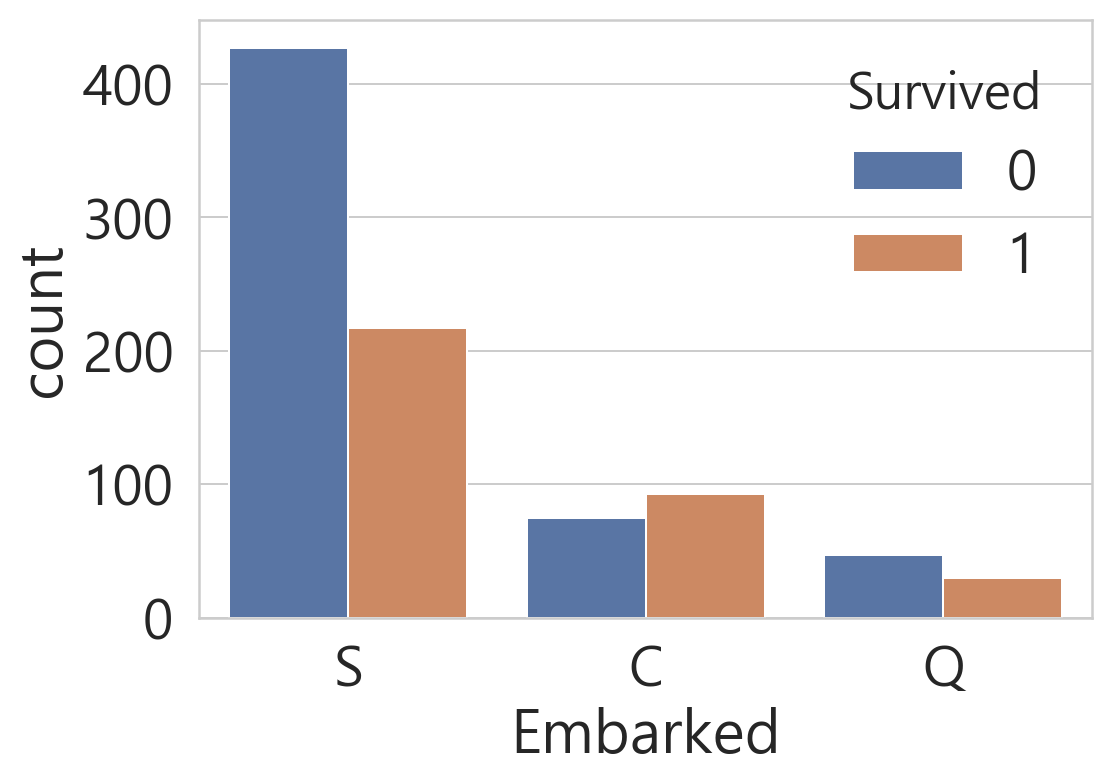

In [178]:
sns.countplot('Embarked', data = df_train, hue = 'Survived')

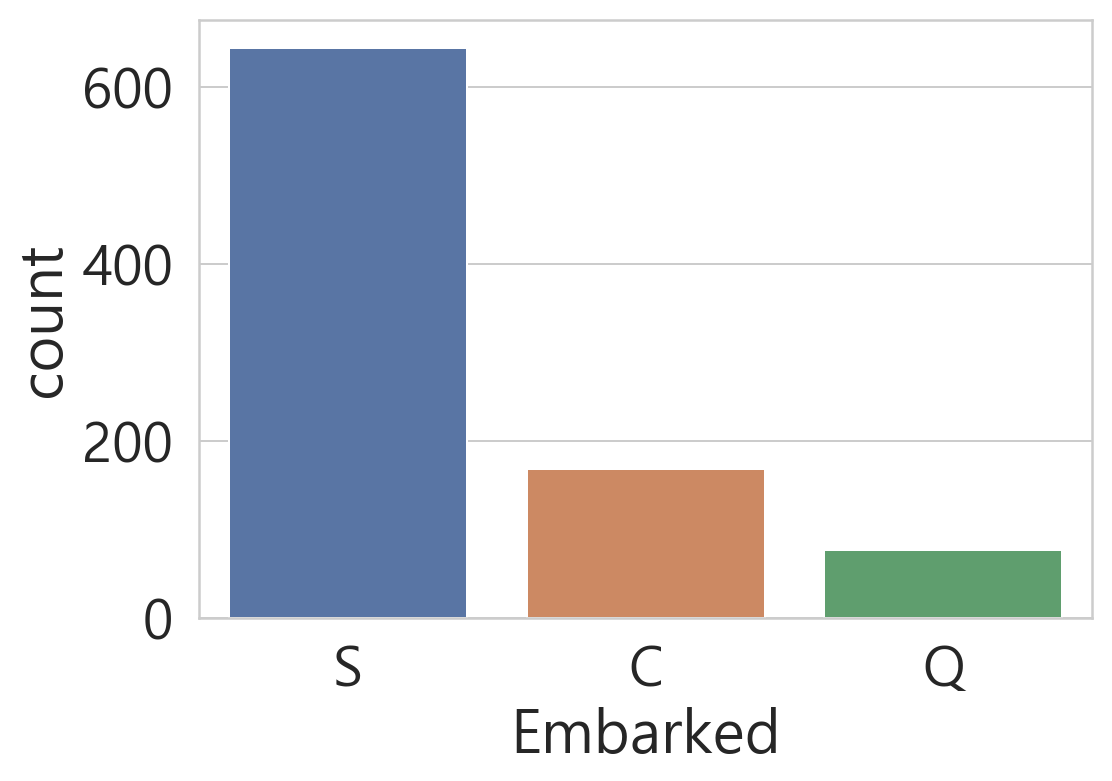

In [179]:
sns.countplot('Embarked', data = df_train)

In [186]:
pd.crosstab(df_train['Pclass'], df_train['Embarked'], margins = True).style.background_gradient(cmap = 'RdBu_r')

Embarked,C,Q,S,All
Pclass,,,,
1,85,2,127,214
2,17,3,164,184
3,66,72,353,491
All,168,77,644,889


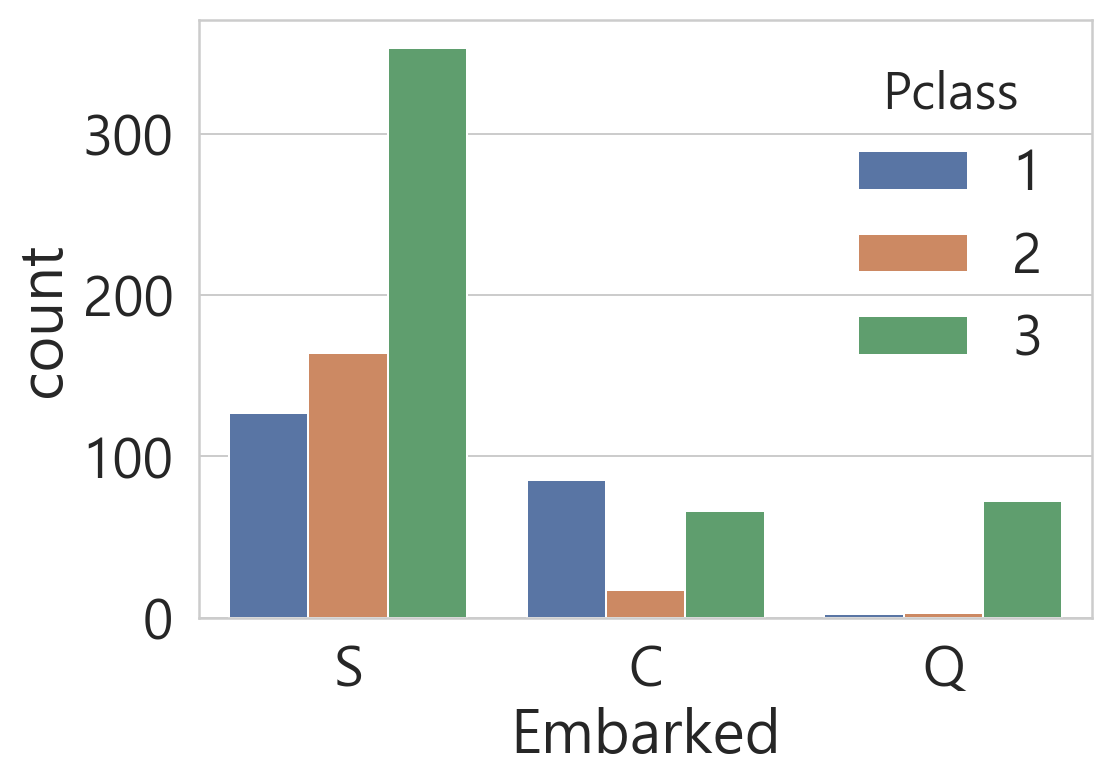

In [187]:
sns.countplot('Embarked', data = df_train, hue = 'Pclass')

In [188]:
df_train['SibSp']

0      1
1      1
2      0
3      1
4      0
5      0
6      0
7      3
8      0
9      1
10     1
11     0
12     0
13     1
14     0
15     0
16     4
17     0
18     1
19     0
20     0
21     0
22     0
23     0
24     3
25     1
26     0
27     3
28     0
29     0
30     0
31     1
32     0
33     0
34     1
35     1
36     0
37     0
38     2
39     1
40     1
41     1
42     0
43     1
44     0
45     0
46     1
47     0
48     2
49     1
50     4
51     0
52     1
53     1
54     0
55     0
56     0
57     0
58     1
59     5
60     0
61     0
62     1
63     3
64     0
65     1
66     0
67     0
68     4
69     2
70     0
71     5
72     0
73     1
74     0
75     0
76     0
77     0
78     0
79     0
80     0
81     0
82     0
83     0
84     0
85     3
86     1
87     0
88     3
89     0
90     0
91     0
92     1
93     1
94     0
95     0
96     0
97     0
98     0
99     1
100    0
101    0
102    0
103    0
104    2
105    0
106    0
107    0
108    0
109    1
110    0
1

In [189]:
df_train['Parch']

0      0
1      0
2      0
3      0
4      0
5      0
6      0
7      1
8      2
9      0
10     1
11     0
12     0
13     5
14     0
15     0
16     1
17     0
18     0
19     0
20     0
21     0
22     0
23     0
24     1
25     5
26     0
27     2
28     0
29     0
30     0
31     0
32     0
33     0
34     0
35     0
36     0
37     0
38     0
39     0
40     0
41     0
42     0
43     2
44     0
45     0
46     0
47     0
48     0
49     0
50     1
51     0
52     0
53     0
54     1
55     0
56     0
57     0
58     2
59     2
60     0
61     0
62     0
63     2
64     0
65     1
66     0
67     0
68     2
69     0
70     0
71     2
72     0
73     0
74     0
75     0
76     0
77     0
78     2
79     0
80     0
81     0
82     0
83     0
84     0
85     0
86     3
87     0
88     2
89     0
90     0
91     0
92     0
93     2
94     0
95     0
96     0
97     1
98     1
99     0
100    0
101    0
102    1
103    0
104    0
105    0
106    0
107    0
108    0
109    0
110    0
1

In [191]:
df_train['FamilySize'] = df_train['SibSp'] + df_train['Parch'] + 1
df_test['FamilySize'] = df_test['SibSp'] + df_test['Parch'] + 1

In [192]:
print(df_train['FamilySize'].min())
print(df_train['FamilySize'].max())

1
11


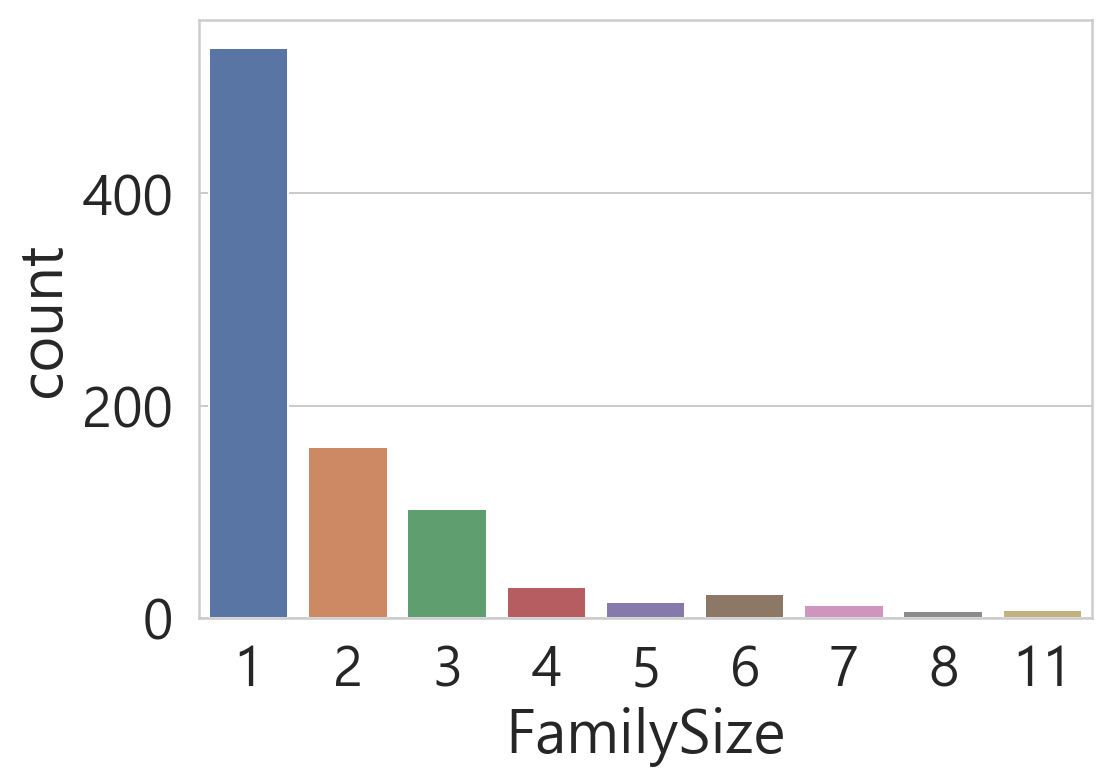

In [193]:
sns.countplot(df_train['FamilySize'])

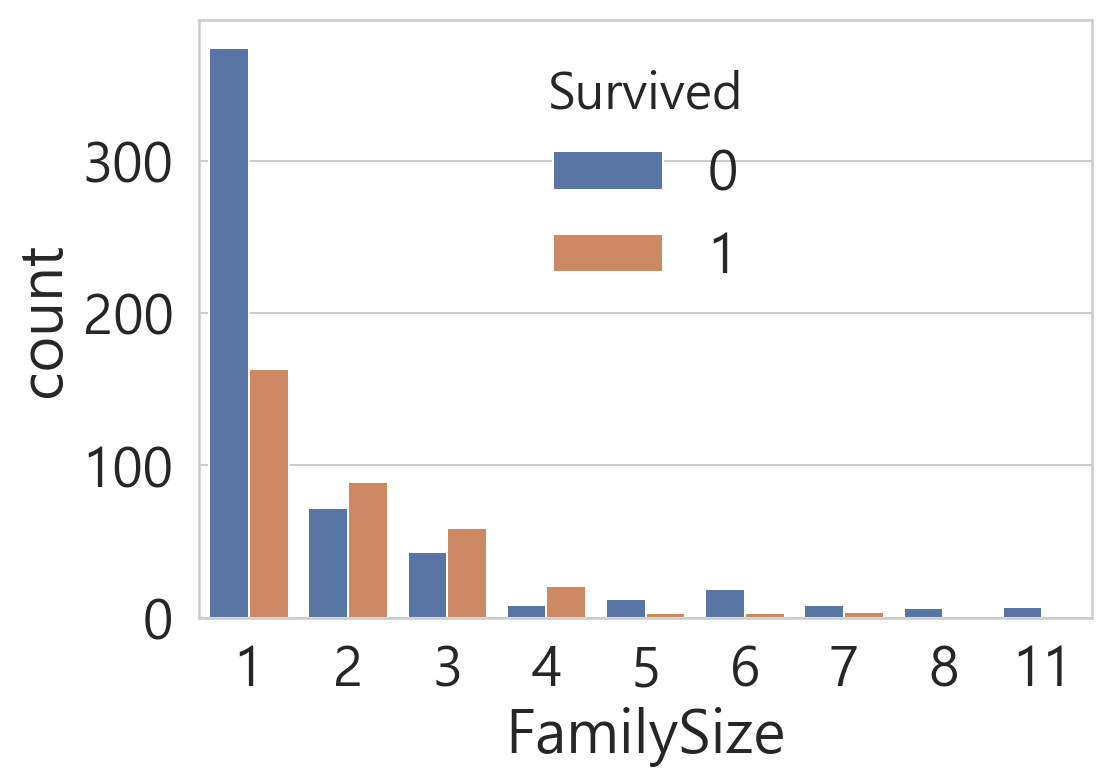

In [195]:
sns.countplot('FamilySize', hue = 'Survived', data = df_train)

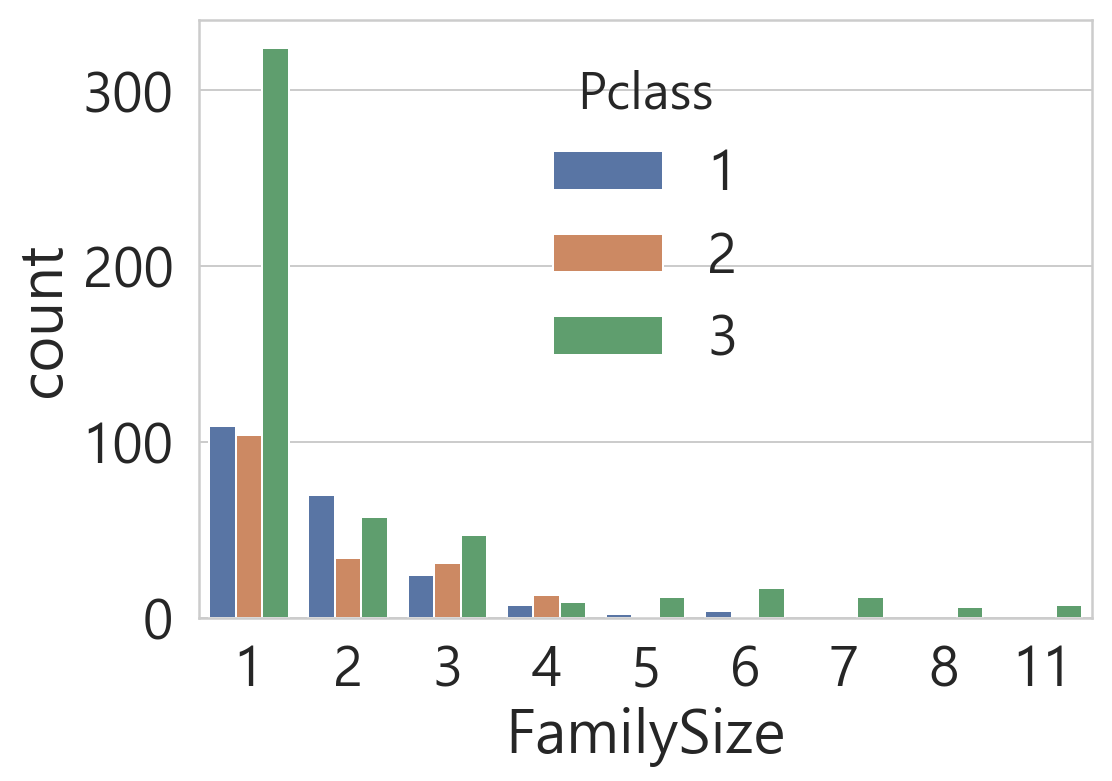

In [196]:
sns.countplot('FamilySize', hue = 'Pclass', data = df_train)

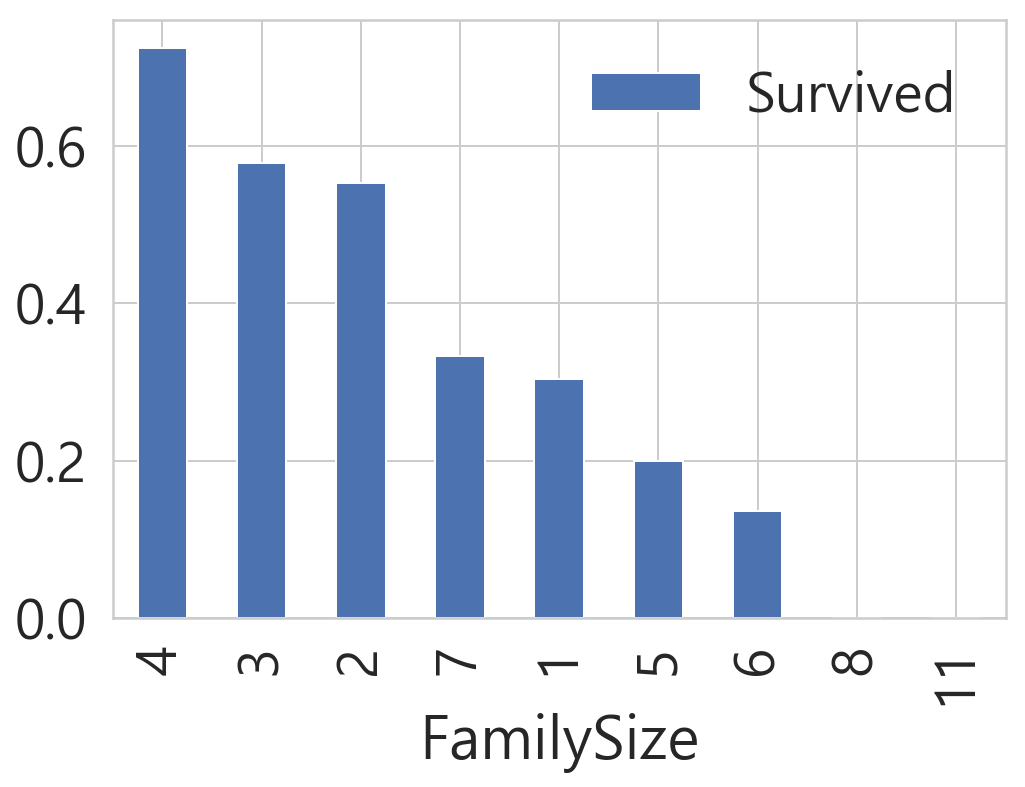

In [203]:
df_train[['FamilySize','Survived']].groupby('FamilySize').mean().sort_values('Survived', ascending = False).plot.bar()

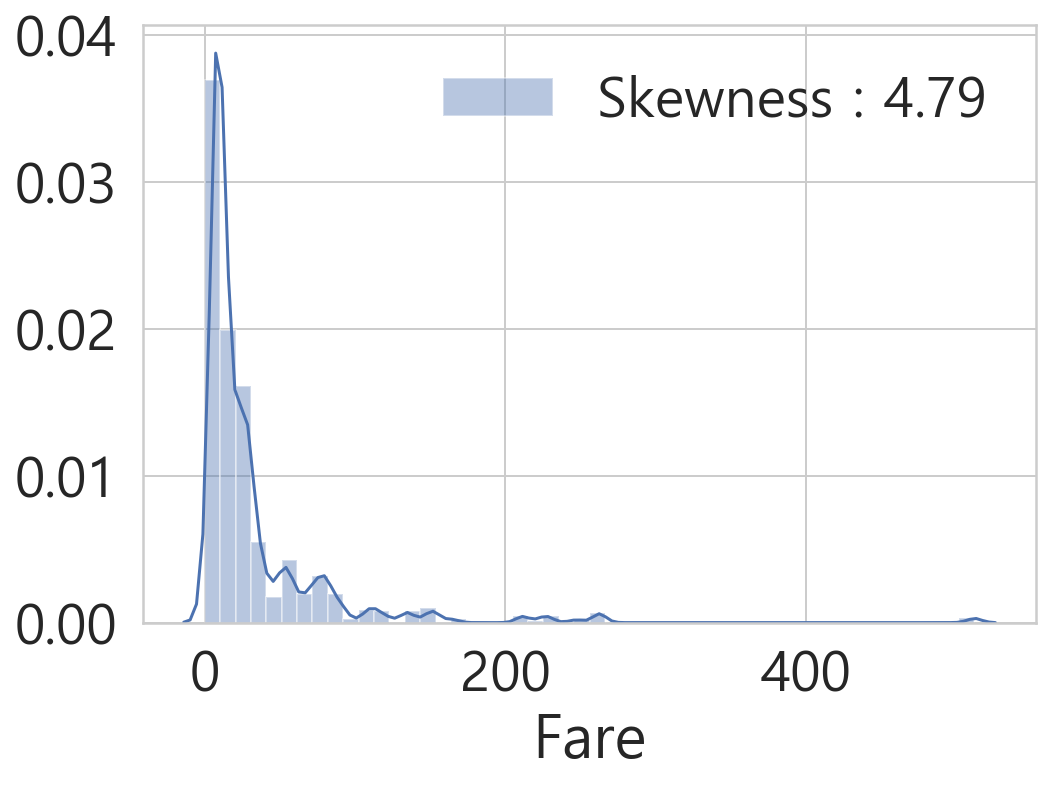

In [208]:
sns.distplot(df_train['Fare'], color = 'b', label = 'Skewness : {:.2f}'.format(df_train['Fare'].skew())).legend(loc = 'best')

In [210]:
df_train['Fare_log'] = df_train['Fare'].copy()

df_train.loc[df_train['Fare'].isnull(), 'Fare_log'] = (
    df_train.loc[df_train['Fare'].isnull(), 'Fare'].mean()
)
df_train['Fare_log'] = df_train['Fare'].apply(lambda x : np.log1p(x))

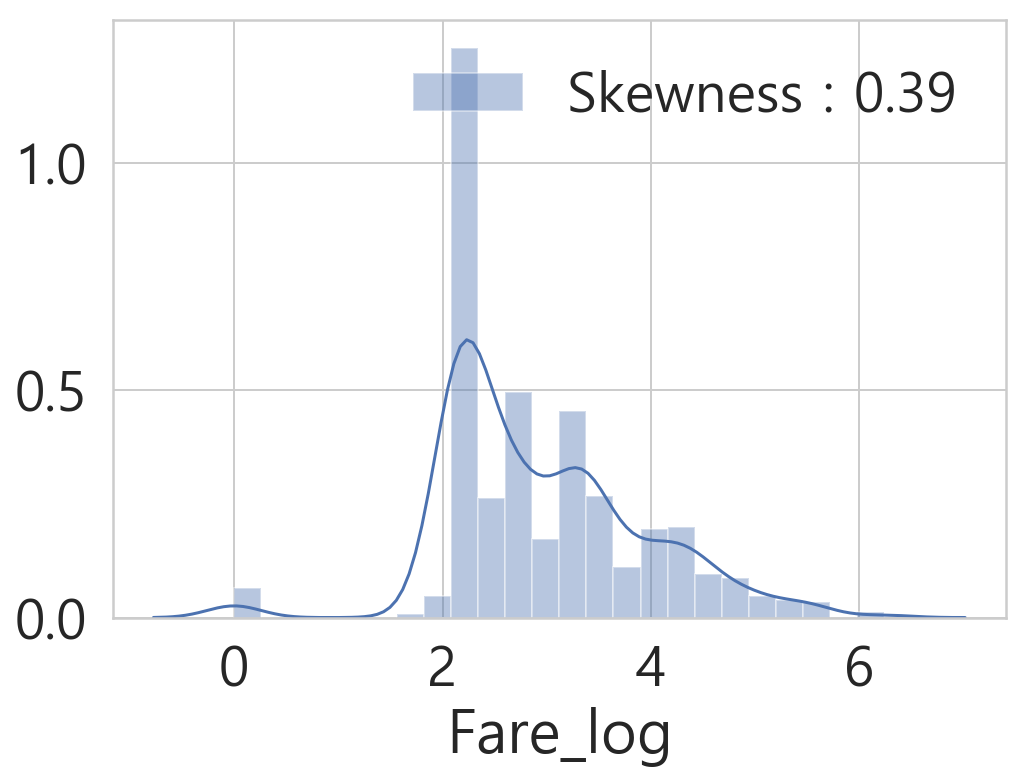

In [217]:
(
    sns.distplot(df_train['Fare_log'],
                 label = 'Skewness : {:.2f}'
                 .format(df_train['Fare_log'].skew()))
    .legend(loc = 'best')
    
)

In [218]:
df_train['Cabin'].unique()

array([nan, 'C85', 'C123', 'E46', 'G6', 'C103', 'D56', 'A6',
       'C23 C25 C27', 'B78', 'D33', 'B30', 'C52', 'B28', 'C83', 'F33',
       'F G73', 'E31', 'A5', 'D10 D12', 'D26', 'C110', 'B58 B60', 'E101',
       'F E69', 'D47', 'B86', 'F2', 'C2', 'E33', 'B19', 'A7', 'C49', 'F4',
       'A32', 'B4', 'B80', 'A31', 'D36', 'D15', 'C93', 'C78', 'D35',
       'C87', 'B77', 'E67', 'B94', 'C125', 'C99', 'C118', 'D7', 'A19',
       'B49', 'D', 'C22 C26', 'C106', 'C65', 'E36', 'C54',
       'B57 B59 B63 B66', 'C7', 'E34', 'C32', 'B18', 'C124', 'C91', 'E40',
       'T', 'C128', 'D37', 'B35', 'E50', 'C82', 'B96 B98', 'E10', 'E44',
       'A34', 'C104', 'C111', 'C92', 'E38', 'D21', 'E12', 'E63', 'A14',
       'B37', 'C30', 'D20', 'B79', 'E25', 'D46', 'B73', 'C95', 'B38',
       'B39', 'B22', 'C86', 'C70', 'A16', 'C101', 'C68', 'A10', 'E68',
       'B41', 'A20', 'D19', 'D50', 'D9', 'A23', 'B50', 'A26', 'D48',
       'E58', 'C126', 'B71', 'B51 B53 B55', 'D49', 'B5', 'B20', 'F G63',
       'C62 C64',

In [220]:
df_train['Ticket'].value_counts()

CA. 2343              7
1601                  7
347082                7
CA 2144               6
3101295               6
347088                6
S.O.C. 14879          5
382652                5
347077                4
4133                  4
2666                  4
PC 17757              4
113781                4
349909                4
LINE                  4
17421                 4
19950                 4
W./C. 6608            4
113760                4
PC 17572              3
110152                3
SC/Paris 2123         3
239853                3
35273                 3
29106                 3
345773                3
PC 17582              3
347742                3
F.C.C. 13529          3
13502                 3
230080                3
110413                3
PC 17755              3
C.A. 34651            3
248727                3
PC 17760              3
363291                3
24160                 3
C.A. 31921            3
371110                3
12749                 2
2659            